In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the necessary libraries
import seaborn as sns                       # For Data Visualization
import matplotlib.pyplot as plt                       # Necessary module for plotting purpose
import warnings                                                      # importing warning library

# add graphs into jupiter notebook
%matplotlib inline
warnings.filterwarnings('ignore')                                    # for ignoring warnings in notebook

import statsmodels.api as sm                        # importing statsmodel api
from sklearn import model_selection                                  # For model_selection
from sklearn.model_selection import train_test_split      # For train-test split

# getting methods for confusion matrix, F1 score, Accuracy Score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,roc_curve,auc,average_precision_score
from sklearn.linear_model import LogisticRegression    # For logistic Regression
from sklearn.naive_bayes import GaussianNB            # For Naive Bayes classifier
from sklearn.neighbors import KNeighborsClassifier  # For K-NN Classifier
from sklearn.svm import SVC                   # For support vector machine based classifier

## Scaling
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [4]:
pdDataOrg = pd.read_csv("/content/drive/MyDrive/Park/Parkinsson disease.csv")        # using pandas read_csv function to load dataset into pdData variable
pdDataOrg.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:


pdData = pdDataOrg.copy()                                               # creating a copy of loanDataOrg into loanData

targetCol = 'status'                                                    # defining target column
targetColDf = pdData.pop(targetCol)                                     # popping target column from loanData df
pdData.insert(len(pdData.columns),targetCol, targetColDf)               # inserting target column to last column

# deleting variables that were used for changing column position of target column
del targetCol
del targetColDf

# converting column names into lower case
pdData.columns = [c.lower() for c in pdData.columns]
# replacing spaces in column names with '_'
pdData.columns = [c.replace(' ', '_') for c in pdData.columns]
# replacing ':' in column names with '_'
pdData.columns = [c.replace(':', '_') for c in pdData.columns]
# replacing '(' in column names with '_'
pdData.columns = [c.replace('(', '_') for c in pdData.columns]
# replacing ')' in column names with '' i.e blank
pdData.columns = [c.replace(')', '') for c in pdData.columns]
# replacing '%' in column names with 'in_percent'
pdData.columns = [c.replace('%', 'in_percent') for c in pdData.columns]

# to check the above printing top 5 rows
pdData.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [7]:
print('\033[1mThe Parkinson\'s disease dataset having "{0}" rows and "{1}" columns\033[0m.'.format(pdData.shape[0],pdData.shape[1]))

The Parkinson's disease dataset having "195" rows and "24" columns.


In [8]:
pdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo_hz              195 non-null    float64
 2   mdvp_fhi_hz             195 non-null    float64
 3   mdvp_flo_hz             195 non-null    float64
 4   mdvp_jitter_in_percent  195 non-null    float64
 5   mdvp_jitter_abs         195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

In [9]:
# setting name column as index column
pdData.set_index('name',inplace=True)

In [10]:
# after setting column 'name' as index now we have less columns to confirm that printing number of rows and column once again
print('\033[1mAfter setting \'name\' column as index of the Dataset,\033[0m now there are \033[1m"{0}"\033[0m Rows and \033[1m"{1}"\033[0m Columns in the given Dataset.'.format(pdData.shape[0],pdData.shape[1]))

After setting 'name' column as index of the Dataset, now there are "195" Rows and "23" Columns in the given Dataset.


In [11]:
# printing top 5 rows once again to check
pd.options.display.max_columns = None
pdData.head()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,shimmer_apq3,shimmer_apq5,mdvp_apq,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
name,,,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [12]:
# printing datatypes of each columns of the dataset

print("\033[1m*"*100)
print("a.\nColumn_Names        Data_Types")
print("*"*30)
print("\033[0m{0}\033[1m".format(pdData.dtypes))
print("*"*30)
print()

# printing No of Columns having different Types of Datatype

print("*"*100)
print("b.\nNumber of Columns with each DataTypes as follows :")
print("*"*50)
print("Column_Names     No_of_Columns\033[0m")
print("*"*30)
print(pdData.dtypes.value_counts())
print("\033[1m*"*30)
print("\033[0m")

# printing Different Column Names of the dataset

print("\033[1m*"*100)
print("c.\nEach Column Names of the dataset")
print("*"*80)
print("\033[0m{0}\033[1m".format(pdData.columns))
print("*"*80)
print("\033[0m")

****************************************************************************************************
a.
Column_Names        Data_Types
******************************
mdvp_fo_hz                float64
mdvp_fhi_hz               float64
mdvp_flo_hz               float64
mdvp_jitter_in_percent    float64
mdvp_jitter_abs           float64
mdvp_rap                  float64
mdvp_ppq                  float64
jitter_ddp                float64
mdvp_shimmer              float64
mdvp_shimmer_db           float64
shimmer_apq3              float64
shimmer_apq5              float64
mdvp_apq                  float64
shimmer_dda               float64
nhr                       float64
hnr                       float64
rpde                      float64
dfa                       float64
spread1                   float64
spread2                   float64
d2                        float64
ppe                       float64
status                      int64
dtype: object
******************************

******

In [13]:
# checking missing values in dataset for each attributes / columns

print("\033[1m*"*100)
print("Column_Name       No_of_Missing_Values")
print("*"*50)
print("\033[0m{0}".format(pdData.isnull().sum()))
print("\033[1m*"*50)
print()

# checking if any duplicate rows available in the dataset

print("*"*100)
print("Showing Duplicate rows if any in the dataset: ")
print("*"*50)
print("\033[0m{0}".format(pdData[pdData.duplicated()]))
print("\033[1m*"*100)
print("\033[0m")

****************************************************************************************************
Column_Name       No_of_Missing_Values
**************************************************
mdvp_fo_hz                0
mdvp_fhi_hz               0
mdvp_flo_hz               0
mdvp_jitter_in_percent    0
mdvp_jitter_abs           0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
status                    0
dtype: int64
**************************************************

****************************************************************************************************

In [14]:
# Five point summary of each attribute
pdData.describe().T

,count,mean,std,min,25%,50%,75%,max
mdvp_fo_hz,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
mdvp_fhi_hz,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
mdvp_flo_hz,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
mdvp_jitter_in_percent,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
mdvp_jitter_abs,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
mdvp_rap,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
mdvp_ppq,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
jitter_ddp,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
mdvp_shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
mdvp_shimmer_db,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [15]:
# checking skewness of the data
pdData.skew().sort_values(ascending=False)

,0
nhr,4.220709
jitter_ddp,3.362058
mdvp_rap,3.360708
mdvp_jitter_in_percent,3.084946
mdvp_ppq,3.073892
mdvp_jitter_abs,2.649071
mdvp_apq,2.618047
mdvp_fhi_hz,2.542146
mdvp_shimmer_db,1.999389
shimmer_apq5,1.798697


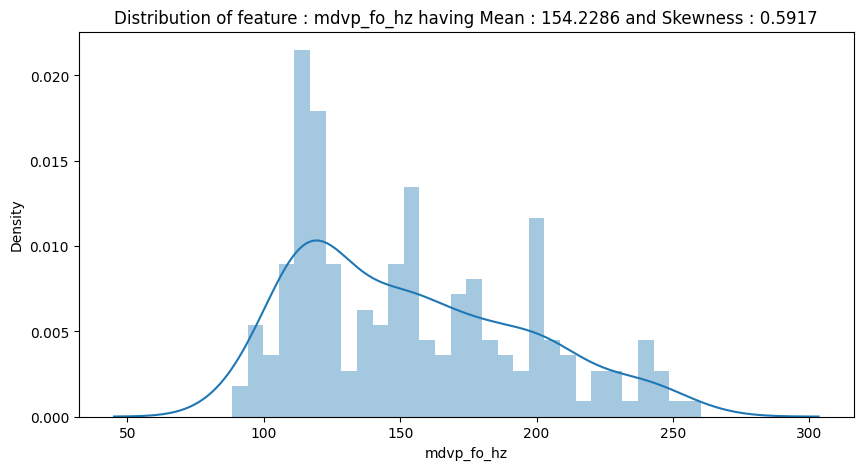

In [16]:
feature = 'mdvp_fo_hz'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

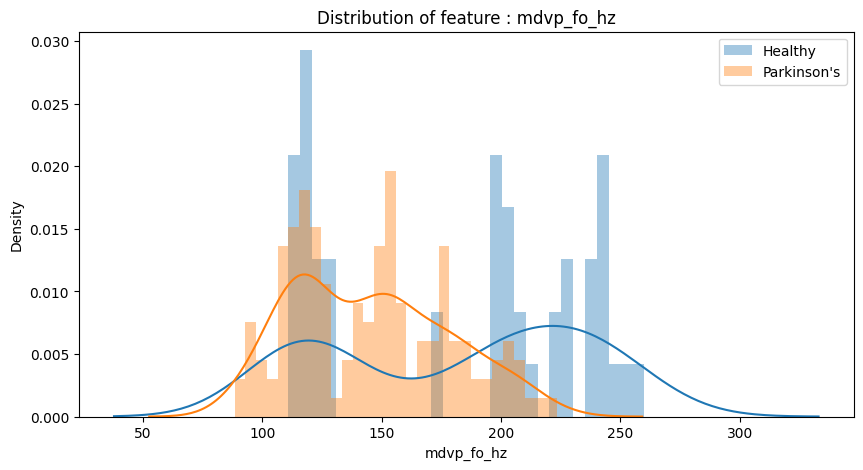

In [17]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                         0           1
mdvp_fo_hz                                  
mdvp_fo_hz : 50-100     0.000000  100.000000
mdvp_fo_hz : 100-150   19.565217   80.434783
mdvp_fo_hz : 150-200   11.475410   88.524590
mdvp_fo_hz : 200-250   65.625000   34.375000
mdvp_fo_hz : 250-300  100.000000    0.000000


Text(0.5, 1.0, 'PD status with different mdvp_fo_hz group')

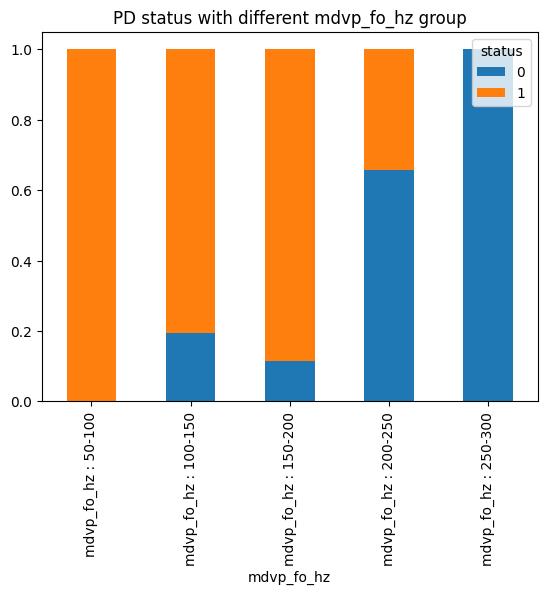

In [18]:
bins = [50,100,150,200,250,300]                                         # defining mdvp_fo_hz bins,
# defining labels of mdvp_fo_hz groups as per bins defined as above
mdvp_fo_hz_group = ['mdvp_fo_hz : 50-100', 'mdvp_fo_hz : 100-150', 'mdvp_fo_hz : 150-200', 'mdvp_fo_hz : 200-250', 'mdvp_fo_hz : 250-300']
pdData_mdvp_fo_hz_bin = pd.cut(pdData.mdvp_fo_hz,bins,labels=mdvp_fo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fo_hz_group_col variable
mdvp_fo_hz_group_col = pd.crosstab(pdData_mdvp_fo_hz_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fo_hz_group_col.div(mdvp_fo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fo_hz group")                     # setting title of the figure

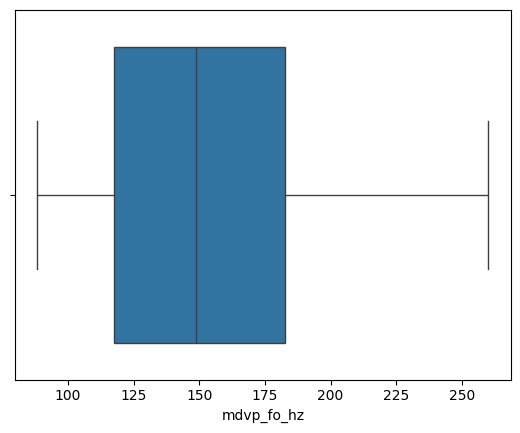

In [19]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='mdvp_fo_hz'>

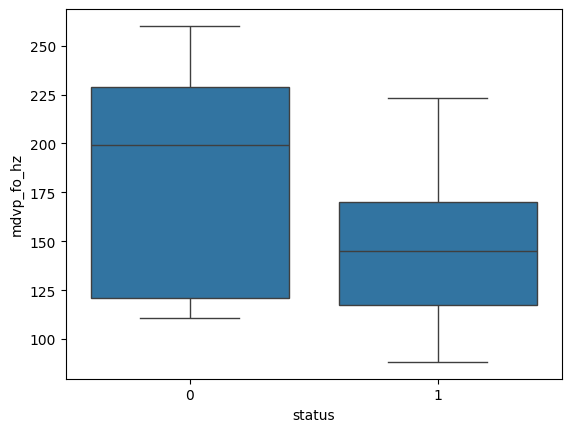

In [20]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

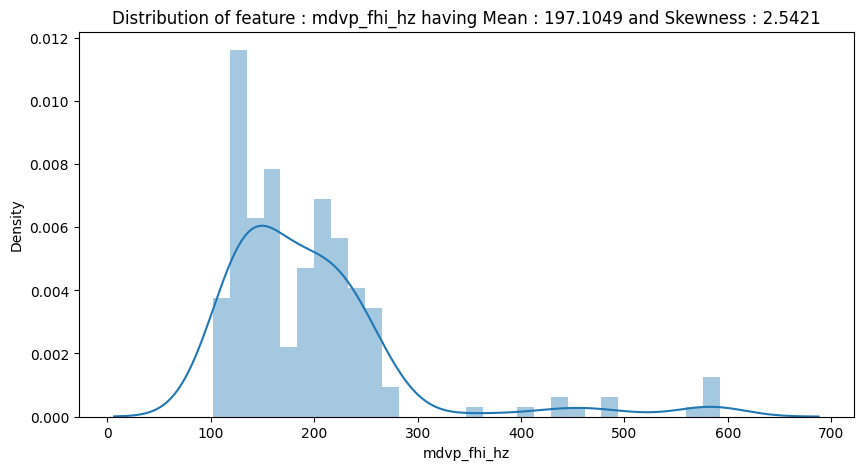

In [21]:
feature = 'mdvp_fhi_hz'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

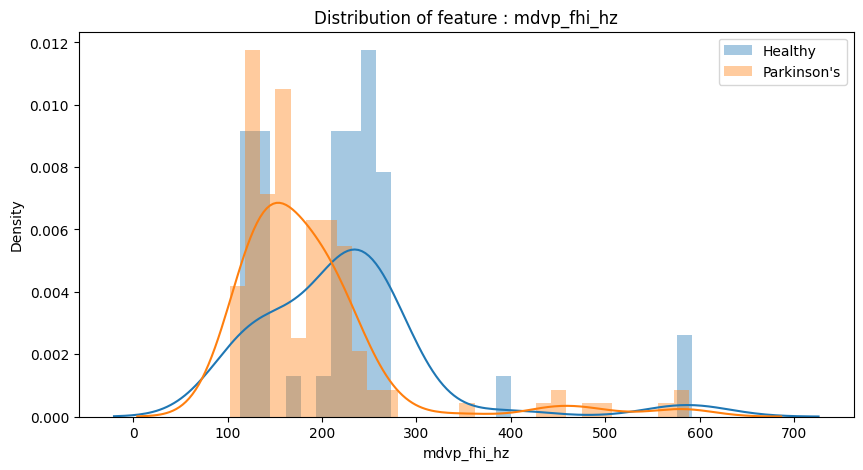

In [22]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                         0           1
mdvp_fhi_hz                                 
mdvp_fhi_hz : 100-200  12.931034   87.068966
mdvp_fhi_hz : 200-300  44.776119   55.223881
mdvp_fhi_hz : 300-400  50.000000   50.000000
mdvp_fhi_hz : 400-500   0.000000  100.000000
mdvp_fhi_hz : 500-600  40.000000   60.000000


Text(0.5, 1.0, 'PD status with different mdvp_fhi_hz group')

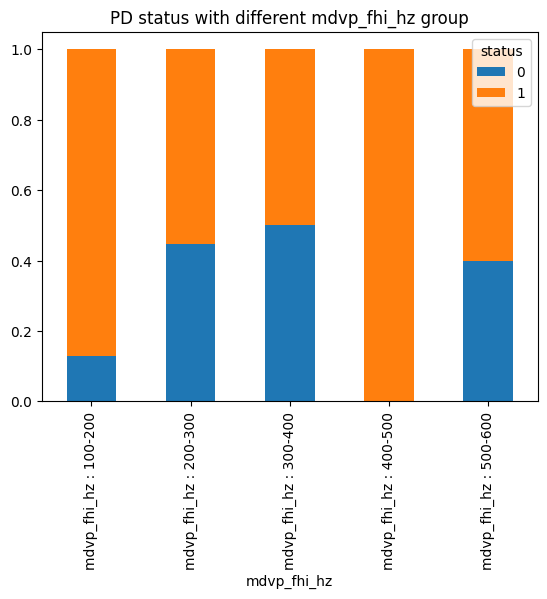

In [23]:
bins = [100,200,300,400,500,600]                                         # defining mdvp_fhi_hz bins,
# defining labels of mdvp_fhi_hz groups as per bins defined as above
mdvp_fhi_hz_group = ['mdvp_fhi_hz : 100-200', 'mdvp_fhi_hz : 200-300', 'mdvp_fhi_hz : 300-400', 'mdvp_fhi_hz : 400-500',
                     'mdvp_fhi_hz : 500-600']
pdData_mdvp_fhi_hz_bin = pd.cut(pdData[feature],bins,labels=mdvp_fhi_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_fhi_hz_group_col variable
mdvp_fhi_hz_group_col = pd.crosstab(pdData_mdvp_fhi_hz_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_fhi_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_fhi_hz_group_col.div(mdvp_fhi_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_fhi_hz group")                     # setting title of the figure

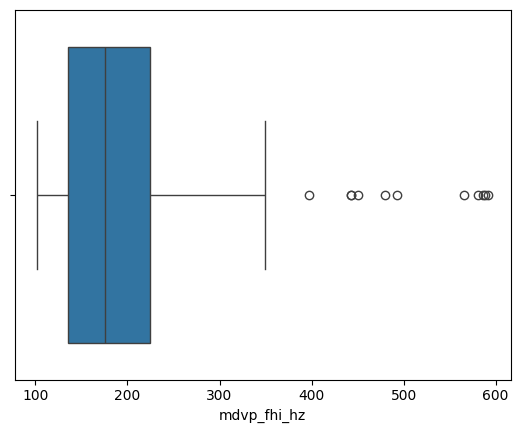

In [24]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [26]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR

outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),3),round(np.median(pdData[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_fhi_hz : Mean = 197.105, Median = 175.829 and Inter-Quartile-Range (IQR) = 89.343

*****************************************************************************************************************************
There are 11 outliers (5.641 % of the data points) in mdvp_fhi_hz feature and the values are [588.518, 586.567, 492.892, 442.557, 450.247, 442.824, 479.697, 565.74, 592.03, 581.289, 396.961]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_fhi_hz'>

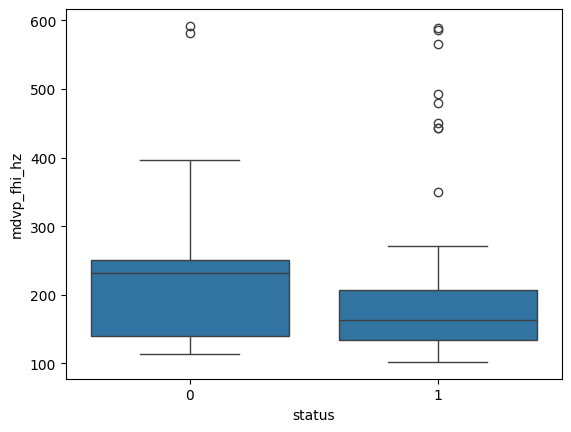

In [27]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

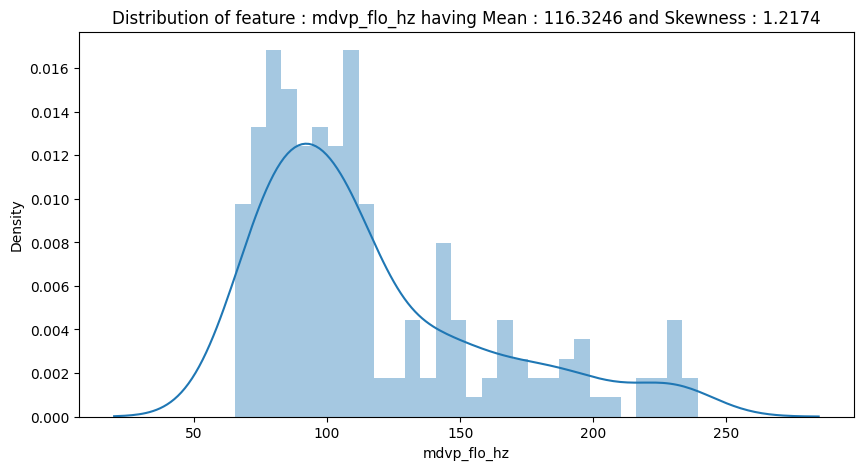

In [28]:
feature = 'mdvp_flo_hz'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),4))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

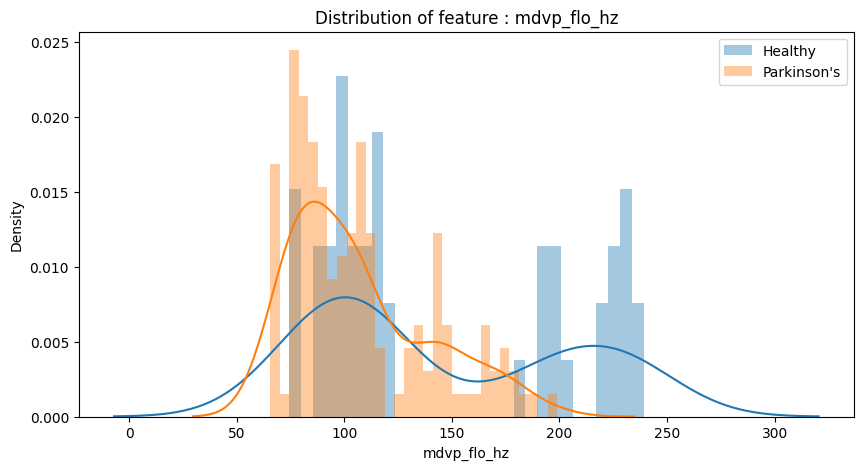

In [29]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                          0          1
mdvp_flo_hz                                 
mdvp_flo_hz : 50-100    16.853933  83.146067
mdvp_flo_hz : 100-150   20.000000  80.000000
mdvp_flo_hz : 150-200   29.166667  70.833333
mdvp_flo_hz : 200-250  100.000000   0.000000


Text(0.5, 1.0, 'PD status with different mdvp_flo_hz group')

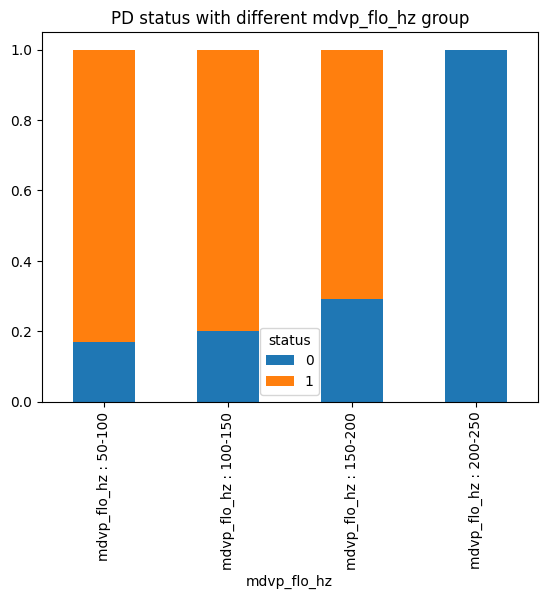

In [30]:
bins = [50,100,150,200,250]                                         # defining mdvp_flo_hz bins,
# defining labels of mdvp_flo_hz groups as per bins defined as above
mdvp_flo_hz_group = ['mdvp_flo_hz : 50-100', 'mdvp_flo_hz : 100-150', 'mdvp_flo_hz : 150-200', 'mdvp_flo_hz : 200-250']
pdData_mdvp_flo_hz_bin = pd.cut(pdData[feature],bins,labels=mdvp_flo_hz_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_flo_hz_group_col variable
mdvp_flo_hz_group_col = pd.crosstab(pdData_mdvp_flo_hz_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_flo_hz_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_flo_hz_group_col.div(mdvp_flo_hz_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_flo_hz group")                     # setting title of the figure

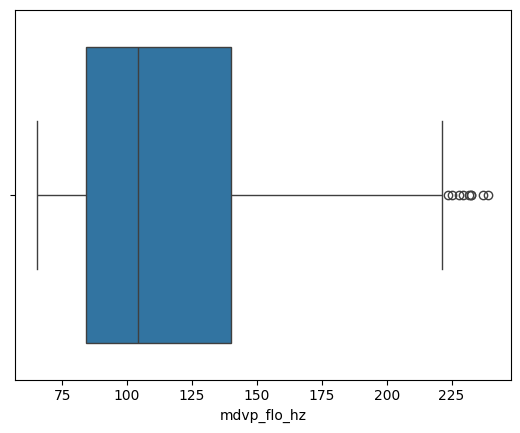

In [31]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

**In the 'mdvp_flo_hz' attribute some outliers are present, let's check for the same :**

In [32]:
Q1 = pdData[feature].quantile(0.25)        #
Q3 = pdData[feature].quantile(0.75)        #
IQR = Q3 - Q1


outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),3),round(np.median(pdData[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_flo_hz : Mean = 116.325, Median = 104.315 and Inter-Quartile-Range (IQR) = 55.728

*****************************************************************************************************************************
There are 9 outliers (4.615 % of the data points) in mdvp_flo_hz feature and the values are [225.227, 232.483, 232.435, 227.911, 231.848, 223.634, 229.256, 237.303, 239.17]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_flo_hz'>

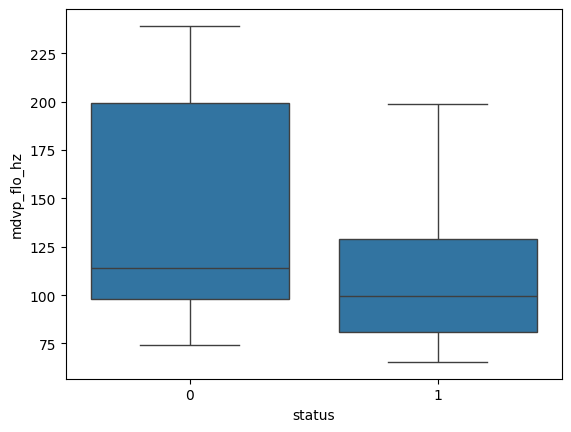

In [33]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

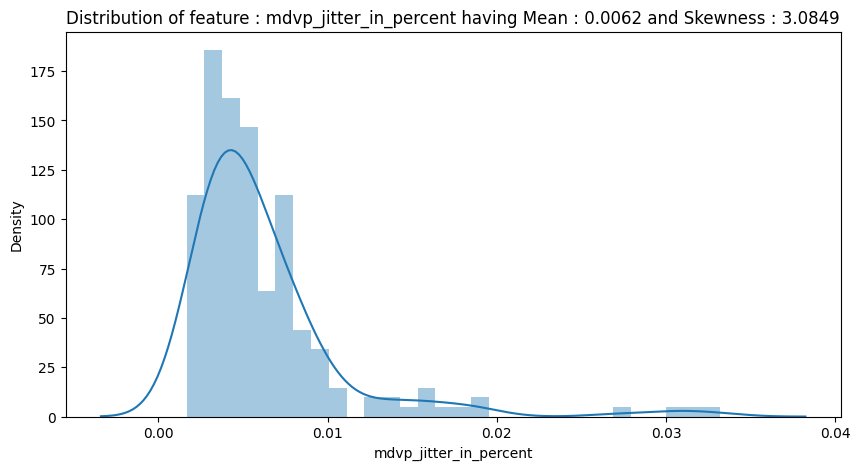

In [35]:
feature = 'mdvp_jitter_in_percent'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),4))        # variable
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable
plt.figure(figsize=(10,5))                                         # setting
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

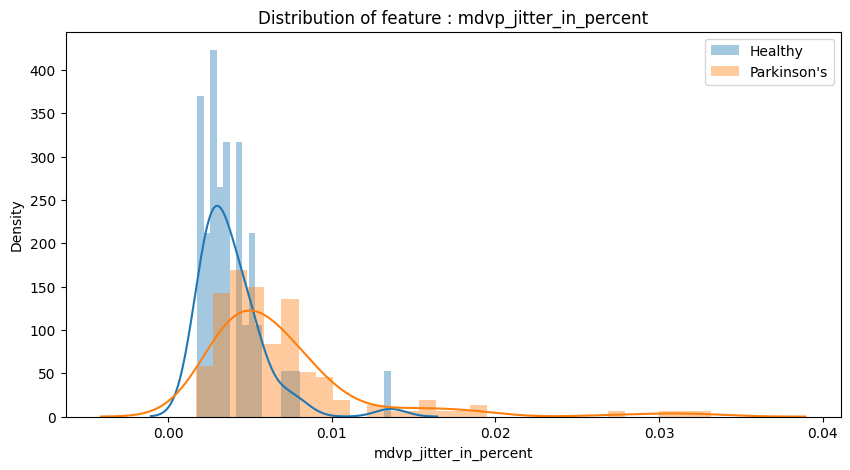

In [36]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                          0           1
mdvp_jitter_in_percent                       
0.001-0.005             38.235294   61.764706
0.005-0.010             10.810811   89.189189
0.010-0.015             12.500000   87.500000
0.015-0.020              0.000000  100.000000
0.025-0.030              0.000000  100.000000
0.030-0.035              0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_jitter_in_percent group')

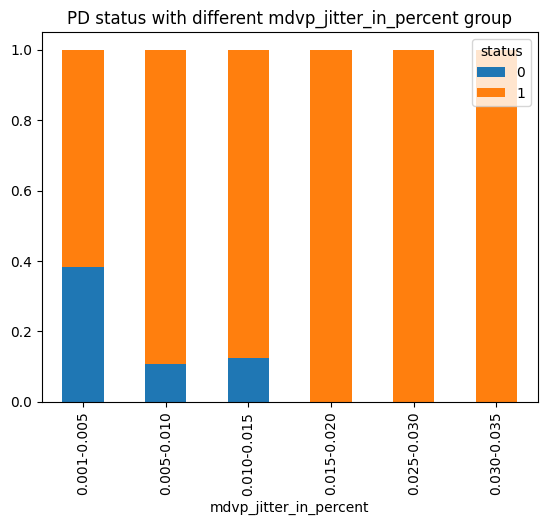

In [37]:
bins = [0.001,0.005,0.010,0.015,0.020,0.025,0.030,0.035]                                         # defining mdvp_jitter_in_percent bins,
# defining labels of mdvp_jitter_in_percent groups as per bins defined as above
mdvp_jitter_in_percent_group = ['0.001-0.005', '0.005-0.010', '0.010-0.015', '0.015-0.020', '0.020-0.025', '0.025-0.030',
                                '0.030-0.035']
pdData_mdvp_jitter_in_percent_bin = pd.cut(pdData[feature],bins,labels=mdvp_jitter_in_percent_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_jitter_in_percent_group_col variable
mdvp_jitter_in_percent_group_col = pd.crosstab(pdData_mdvp_jitter_in_percent_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_jitter_in_percent_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_jitter_in_percent_group_col.div(mdvp_jitter_in_percent_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_jitter_in_percent group")                     # setting title of the figure

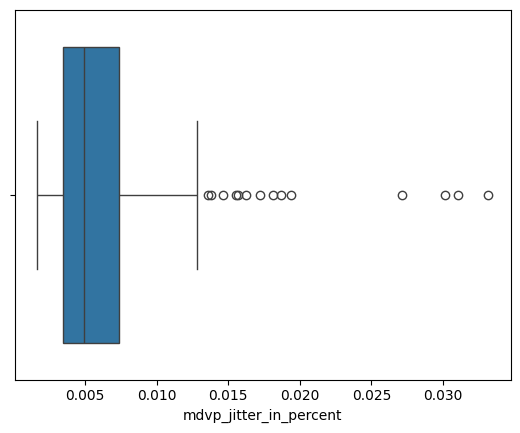

In [38]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [39]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),3),round(np.median(pdData[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_jitter_in_percent : Mean = 0.006, Median = 0.005 and Inter-Quartile-Range (IQR) = 0.004

*****************************************************************************************************************************
There are 14 outliers (7.179 % of the data points) in mdvp_jitter_in_percent feature and the values are [0.01378, 0.01936, 0.03316, 0.01551, 0.03011, 0.01568, 0.01466, 0.01719, 0.01627, 0.01872, 0.03107, 0.02714, 0.01813, 0.0136]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_jitter_in_percent'>

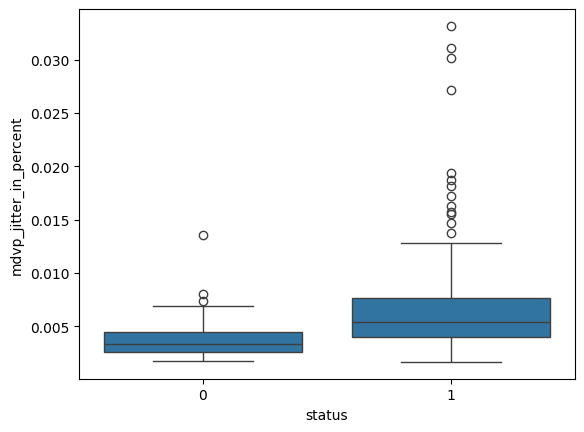

In [40]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

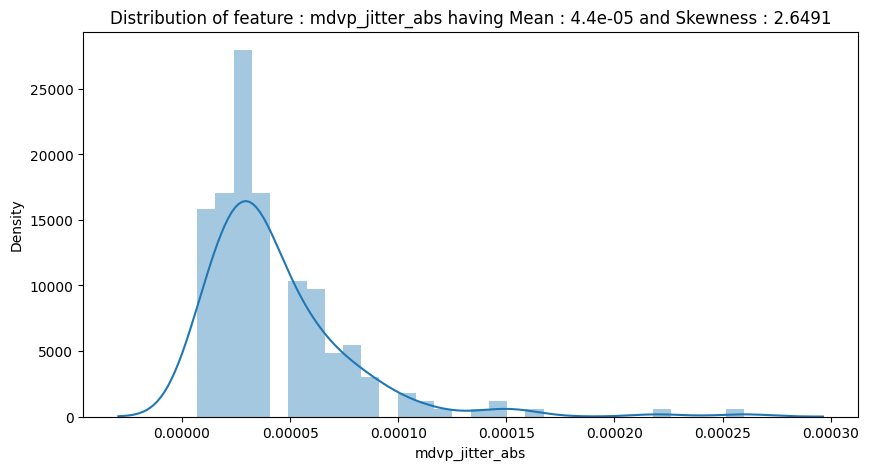

In [41]:
feature = 'mdvp_jitter_abs'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

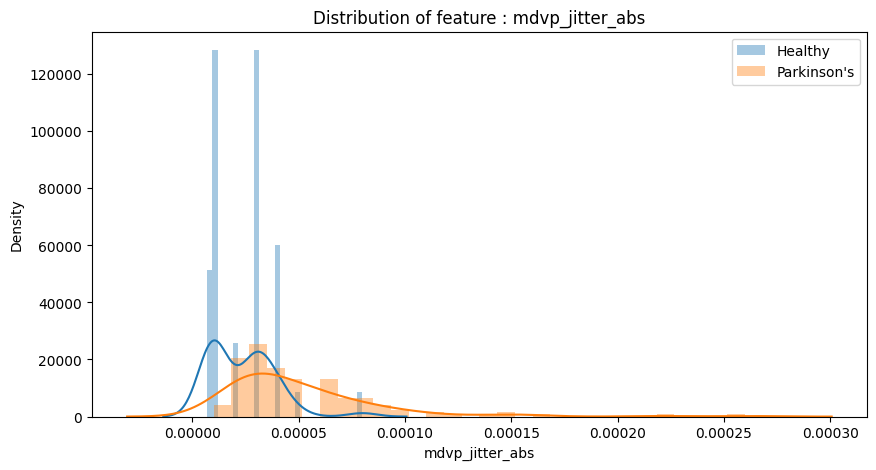

In [42]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                  0           1
mdvp_jitter_abs                      
0.00004-0.00010  3.448276   96.551724
0.00010-0.00015  0.000000  100.000000
0.00015-0.00020  0.000000  100.000000
0.00020-0.00026  0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_jitter_abs group')

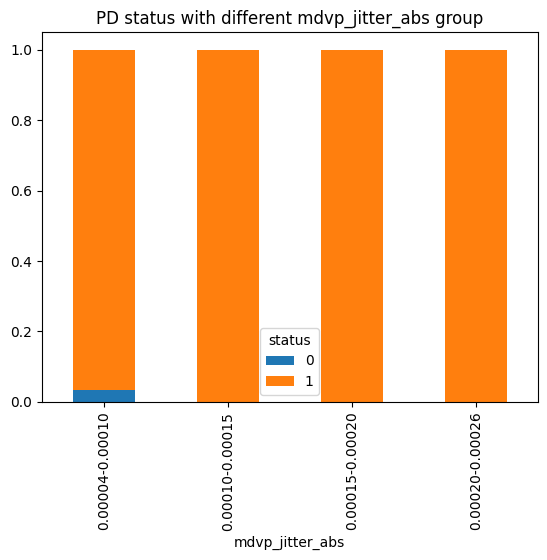

In [43]:
bins = [0.00004,0.00010,0.00015,0.00020,0.00026]                                         # defining mdvp_jitter_abs bins,
# defining labels of mdvp_jitter_abs groups as per bins defined as above
mdvp_jitter_abs_group = ['0.00004-0.00010', '0.00010-0.00015', '0.00015-0.00020', '0.00020-0.00026']
pdData_mdvp_jitter_abs_bin = pd.cut(pdData[feature],bins,labels=mdvp_jitter_abs_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_jitter_abs_group_col variable
mdvp_jitter_abs_group_col = pd.crosstab(pdData_mdvp_jitter_abs_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_jitter_abs_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_jitter_abs_group_col.div(mdvp_jitter_abs_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_jitter_abs group")                     # setting title of the figure

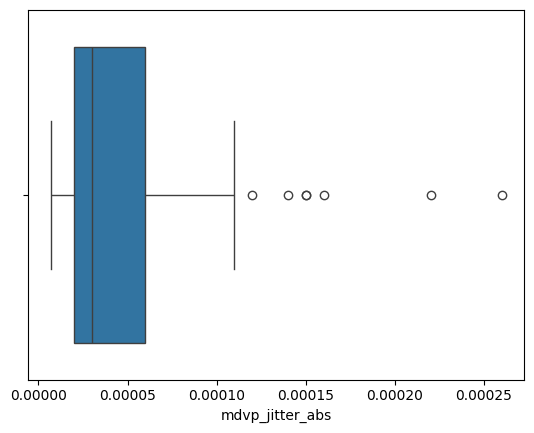

In [44]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [45]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_jitter_abs : Mean = 4.4e-05, Median = 3e-05 and Inter-Quartile-Range (IQR) = 4e-05

*****************************************************************************************************************************
There are 7 outliers (3.59 % of the data points) in mdvp_jitter_abs feature and the values are [0.00015, 0.00026, 0.00012, 0.00022, 0.00016, 0.00014, 0.00015]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_jitter_abs'>

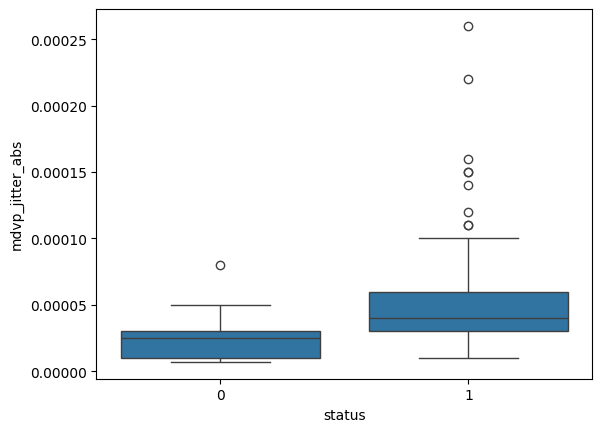

In [46]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

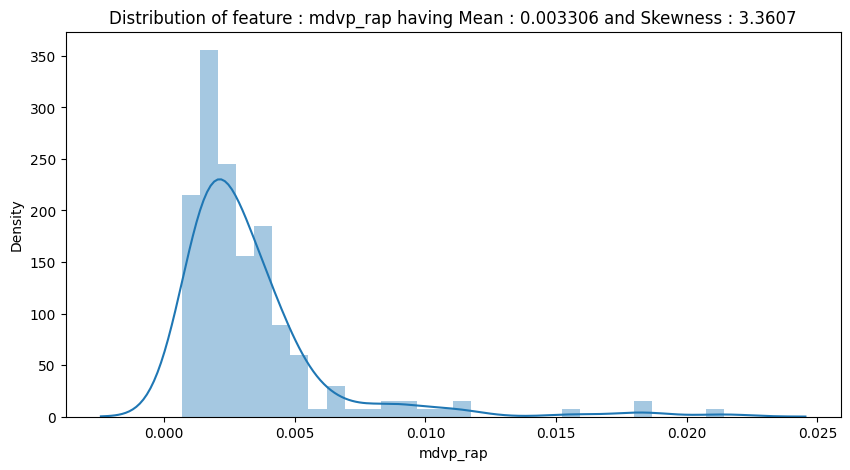

In [47]:
feature = 'mdvp_rap'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

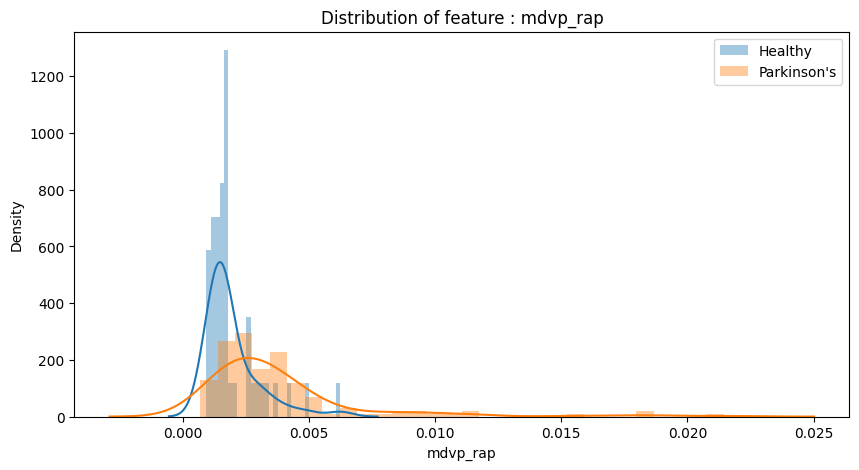

In [48]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status               0           1
mdvp_rap                          
0.000-0.005  27.647059   72.352941
0.005-.010    5.555556   94.444444
0.010-0.015   0.000000  100.000000
0.015-0.020   0.000000  100.000000
0.020-0.025   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_rap group')

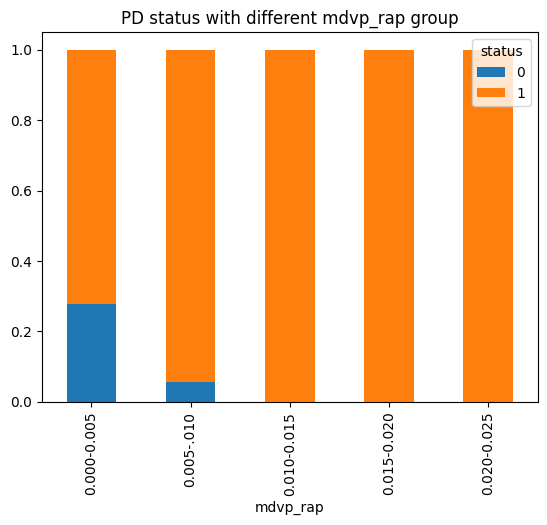

In [49]:
bins = [0.000,0.005,0.010,0.015,0.020,0.025]                                         # defining mdvp_rap bins,
# defining labels of mdvp_rap groups as per bins defined as above
mdvp_rap_group = ['0.000-0.005', '0.005-.010', '0.010-0.015', '0.015-0.020', '0.020-0.025']
pdData_mdvp_rap_bin = pd.cut(pdData[feature],bins,labels=mdvp_rap_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_rap_group_col variable
mdvp_rap_group_col = pd.crosstab(pdData_mdvp_rap_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_rap_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_rap_group_col.div(mdvp_rap_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_rap group")                     # setting title of the figure

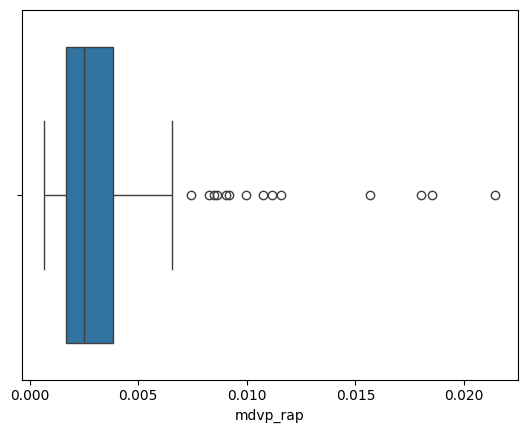

In [50]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [51]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_rap : Mean = 0.003306, Median = 0.0025 and Inter-Quartile-Range (IQR) = 0.002175

*****************************************************************************************************************************
There are 14 outliers (7.179 % of the data points) in mdvp_rap feature and the values are [0.00743, 0.00826, 0.01159, 0.02144, 0.00905, 0.01854, 0.00863, 0.00849, 0.00996, 0.00919, 0.01075, 0.018, 0.01568, 0.01117]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_rap'>

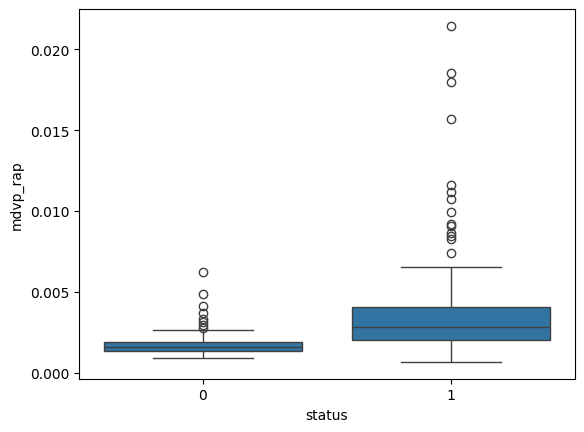

In [52]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

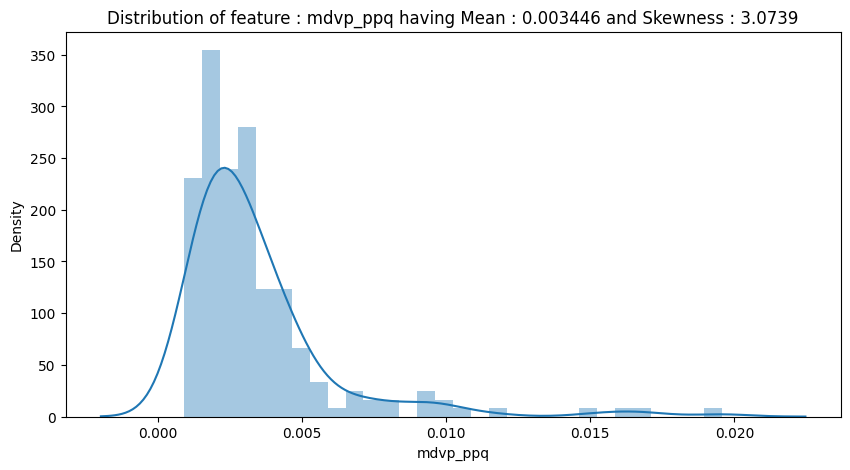

In [53]:
feature = 'mdvp_ppq'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

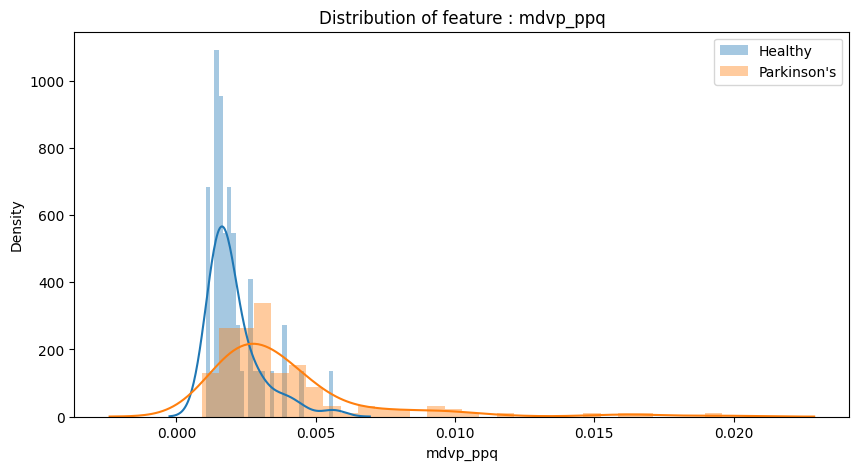

In [54]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status               0           1
mdvp_ppq                          
0.000-0.005  27.647059   72.352941
0.005-.010    5.263158   94.736842
0.010-0.015   0.000000  100.000000
0.015-0.020   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_ppq group')

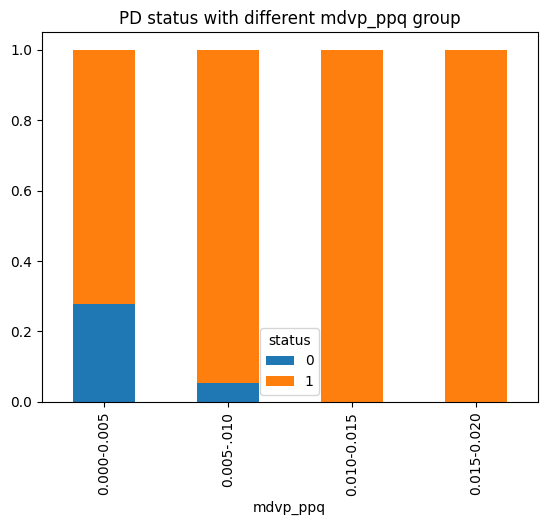

In [55]:
bins = [0.000,0.005,0.010,0.015,0.020]                                         # defining mdvp_ppq bins,
# defining labels of mdvp_ppq groups as per bins defined as above
mdvp_ppq_group = ['0.000-0.005', '0.005-.010', '0.010-0.015', '0.015-0.020']
pdData_mdvp_ppq_bin = pd.cut(pdData[feature],bins,labels=mdvp_ppq_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_ppq_group_col variable
mdvp_ppq_group_col = pd.crosstab(pdData_mdvp_ppq_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_ppq_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_ppq_group_col.div(mdvp_ppq_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_ppq group")                     # setting title of the figure

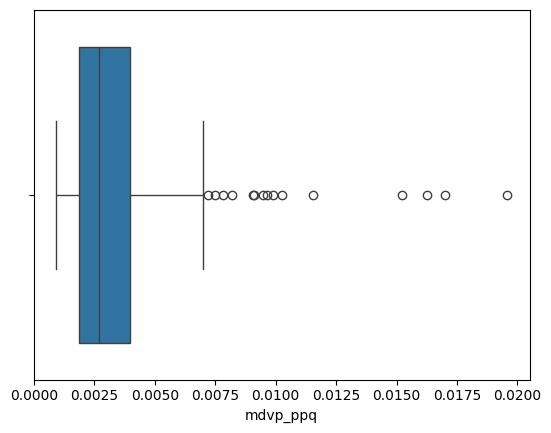

In [56]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [57]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_ppq : Mean = 0.003446, Median = 0.00269 and Inter-Quartile-Range (IQR) = 0.002095

*****************************************************************************************************************************
There are 15 outliers (7.692 % of the data points) in mdvp_ppq feature and the values are [0.00781, 0.00908, 0.0075, 0.0099, 0.01522, 0.00909, 0.01628, 0.00946, 0.00819, 0.01027, 0.00963, 0.01154, 0.01958, 0.01699, 0.00718]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_ppq'>

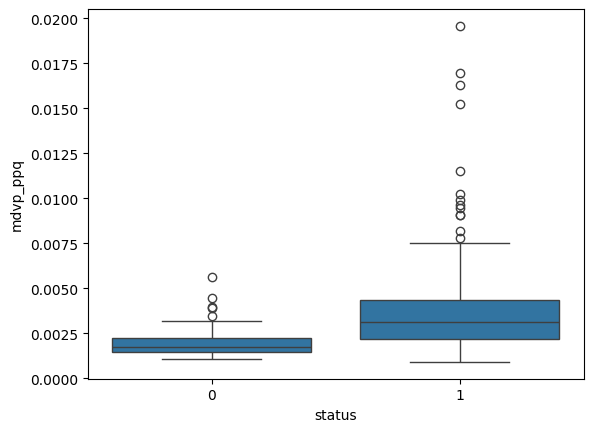

In [58]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

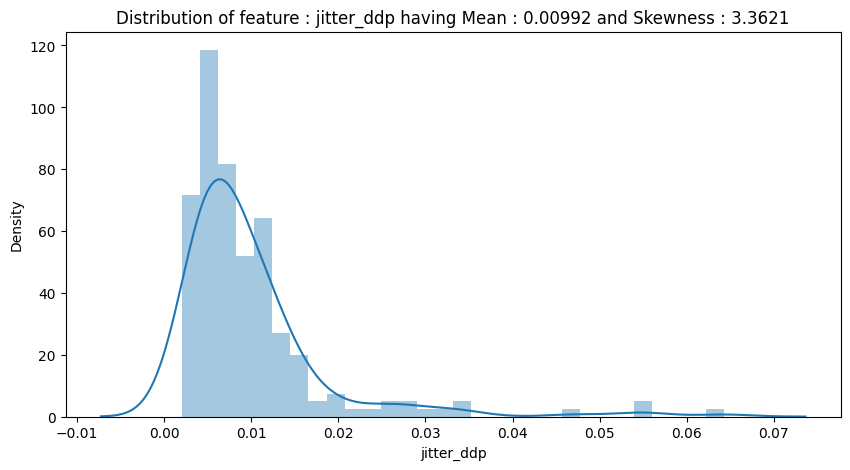

In [59]:
feature = 'jitter_ddp'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

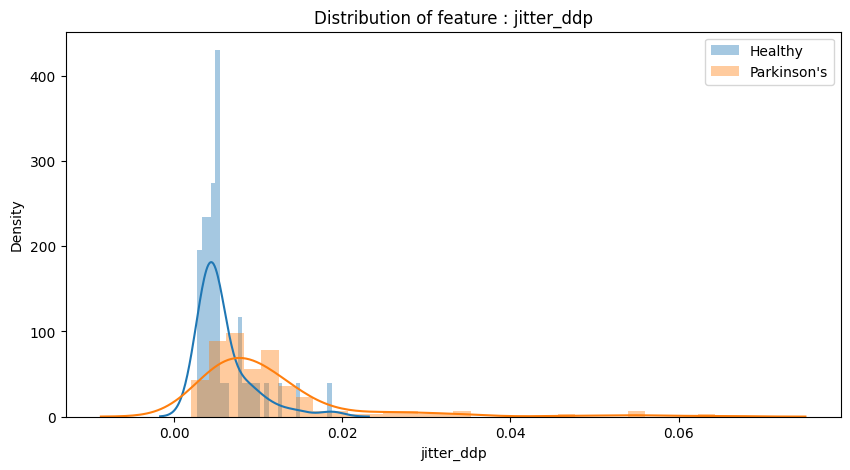

In [60]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status              0           1
jitter_ddp                       
0.00-0.02   26.519337   73.480663
0.02-0.04    0.000000  100.000000
0.04-0.06    0.000000  100.000000
0.06-0.08    0.000000  100.000000


Text(0.5, 1.0, 'PD status with different jitter_ddp group')

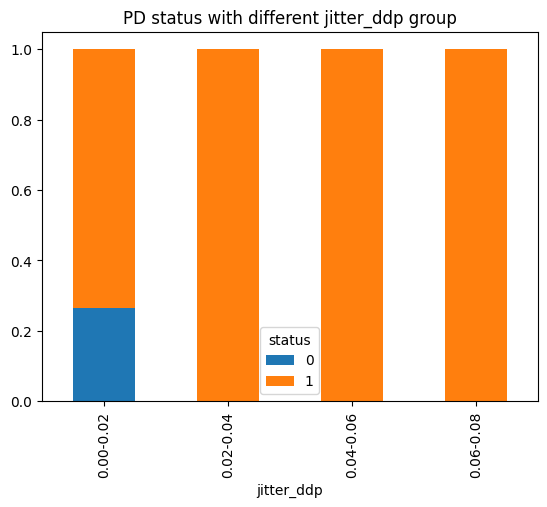

In [61]:
bins = [0.00,0.02,0.04,0.06,0.80]                                         # defining jitter_ddp bins,
# defining labels of jitter_ddp groups as per bins defined as above
jitter_ddp_group = ['0.00-0.02', '0.02-0.04', '0.04-0.06', '0.06-0.08']
pdData_jitter_ddp_bin = pd.cut(pdData[feature],bins,labels=jitter_ddp_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to jitter_ddp_group_col variable
jitter_ddp_group_col = pd.crosstab(pdData_jitter_ddp_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(jitter_ddp_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
jitter_ddp_group_col.div(jitter_ddp_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different jitter_ddp group")                     # setting title of the figure

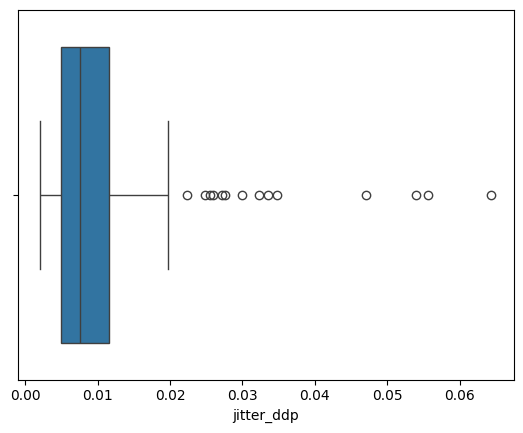

In [62]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [63]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature jitter_ddp : Mean = 0.00992, Median = 0.00749 and Inter-Quartile-Range (IQR) = 0.00652

*****************************************************************************************************************************
There are 14 outliers (7.179 % of the data points) in jitter_ddp feature and the values are [0.02228, 0.02478, 0.03476, 0.06433, 0.02716, 0.05563, 0.02589, 0.02546, 0.02987, 0.02756, 0.03225, 0.05401, 0.04705, 0.03351]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='jitter_ddp'>

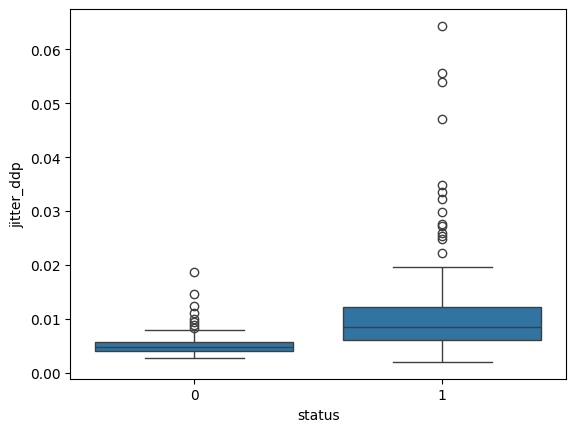

In [64]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

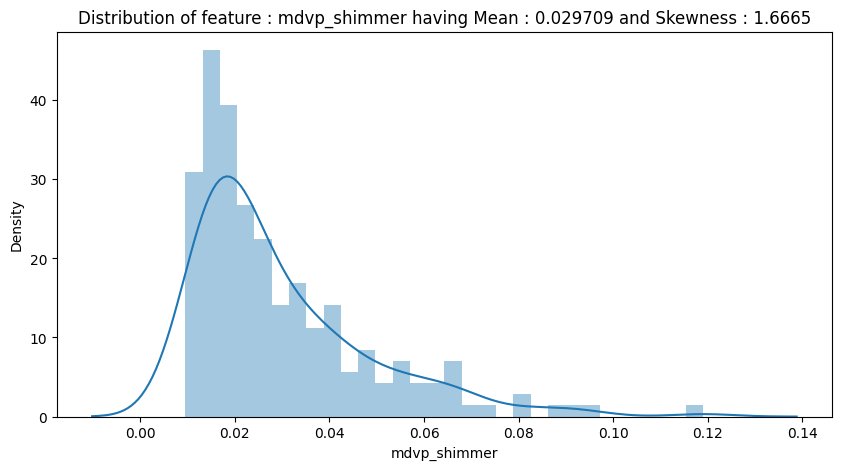

In [65]:
feature = 'mdvp_shimmer'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

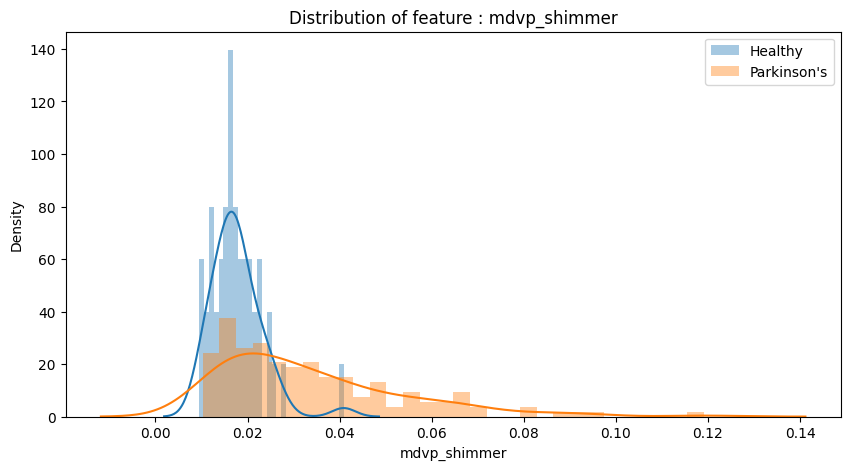

In [66]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                0           1
mdvp_shimmer                       
0.00-0.02     44.871795   55.128205
0.02-0.04     16.438356   83.561644
0.04-0.06      3.703704   96.296296
0.06-0.08      0.000000  100.000000
0.08-0.10      0.000000  100.000000
0.10-0.12      0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_shimmer group')

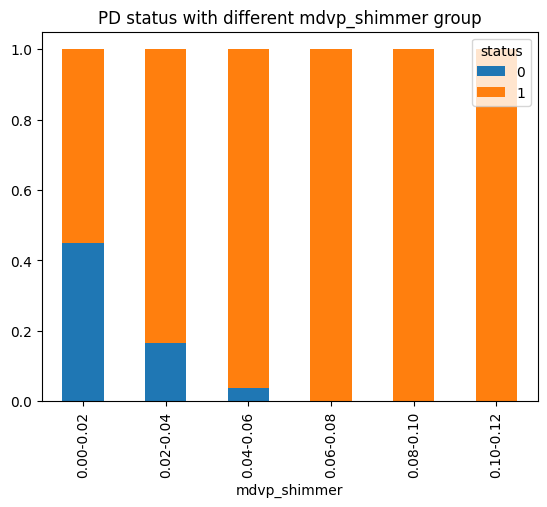

In [67]:
bins = [0.00,0.02,0.04,0.06,0.08,0.10,0.12]                                         # defining mdvp_shimmer bins,
# defining labels of mdvp_shimmer groups as per bins defined as above
mdvp_shimmer_group = ['0.00-0.02', '0.02-0.04', '0.04-0.06', '0.06-0.08', '0.08-0.10', '0.10-0.12']
pdData_mdvp_shimmer_bin = pd.cut(pdData[feature],bins,labels=mdvp_shimmer_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_shimmer_group_col variable
mdvp_shimmer_group_col = pd.crosstab(pdData_mdvp_shimmer_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_shimmer_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_shimmer_group_col.div(mdvp_shimmer_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_shimmer group")                     # setting title of the figure

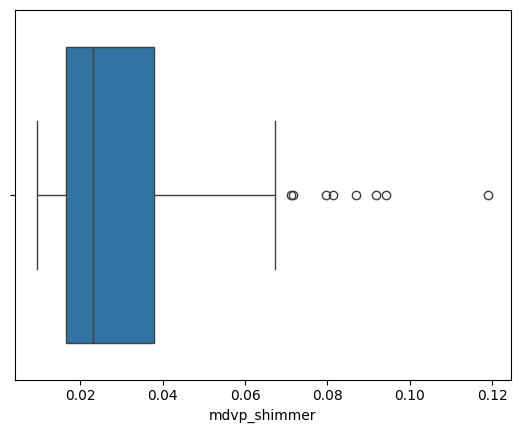

In [68]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [69]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_shimmer : Mean = 0.029709, Median = 0.02297 and Inter-Quartile-Range (IQR) = 0.02138

*****************************************************************************************************************************
There are 8 outliers (4.103 % of the data points) in mdvp_shimmer feature and the values are [0.07959, 0.09178, 0.09419, 0.08143, 0.07118, 0.0717, 0.11908, 0.08684]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_shimmer'>

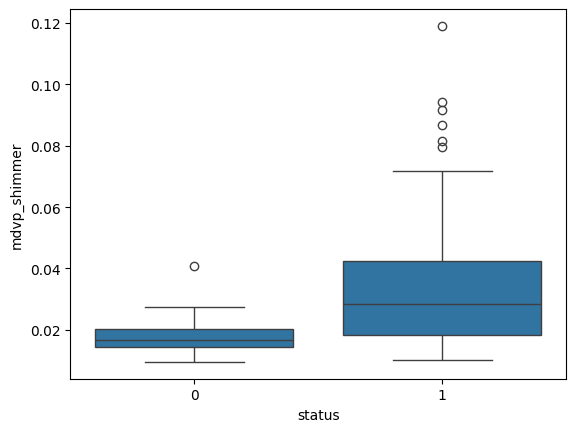

In [70]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

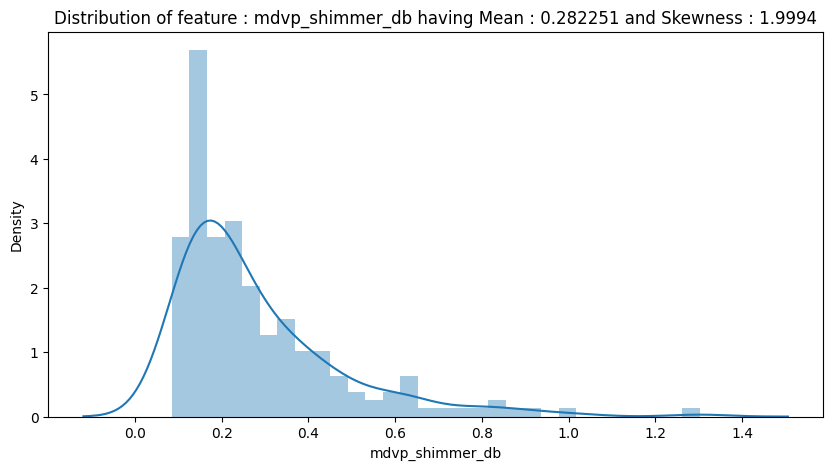

In [71]:
feature = 'mdvp_shimmer_db'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

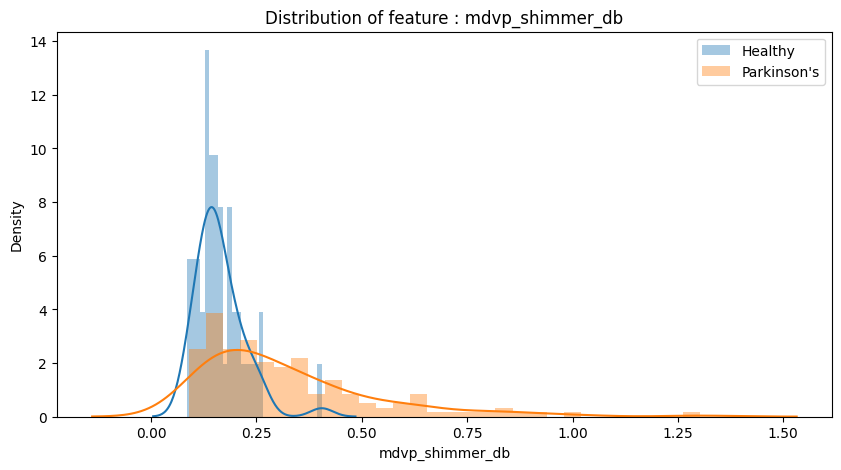

In [72]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                   0           1
mdvp_shimmer_db                       
0.00-0.25        38.596491   61.403509
0.25-0.50         6.779661   93.220339
0.50-0.75         0.000000  100.000000
0.75-1.00         0.000000  100.000000
1.00-1.25         0.000000  100.000000
1.25-1.50         0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_shimmer_db group')

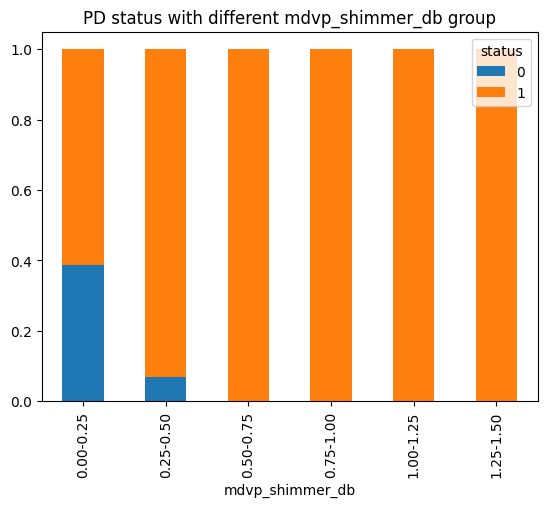

In [73]:
bins = [0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50]                                         # defining mdvp_shimmer_db bins,
# defining labels of mdvp_shimmer_db groups as per bins defined as above
mdvp_shimmer_db_group = ['0.00-0.25', '0.25-0.50', '0.50-0.75', '0.75-1.00', '1.00-1.25', '1.25-1.50']
pdData_mdvp_shimmer_db_bin = pd.cut(pdData[feature],bins,labels=mdvp_shimmer_db_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_shimmer_db_group_col variable
mdvp_shimmer_db_group_col = pd.crosstab(pdData_mdvp_shimmer_db_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_shimmer_db_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_shimmer_db_group_col.div(mdvp_shimmer_db_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_shimmer_db group")                     # setting title of the figure

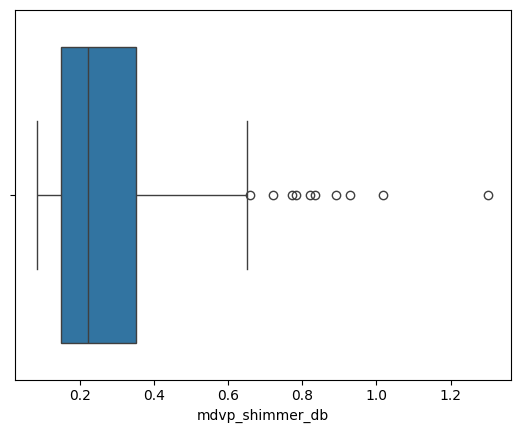

In [74]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [75]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_shimmer_db : Mean = 0.282251, Median = 0.221 and Inter-Quartile-Range (IQR) = 0.2015

*****************************************************************************************************************************
There are 10 outliers (5.128 % of the data points) in mdvp_shimmer_db feature and the values are [0.772, 0.659, 0.891, 0.93, 0.821, 0.722, 0.833, 0.784, 1.302, 1.018]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_shimmer_db'>

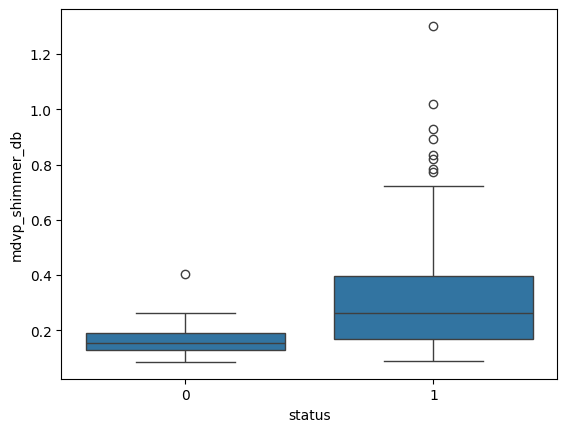

In [76]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

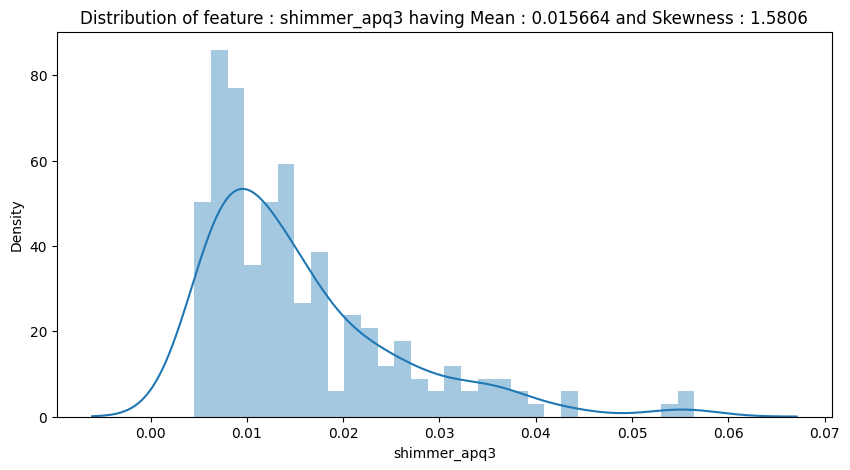

In [77]:
feature = 'shimmer_apq3'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

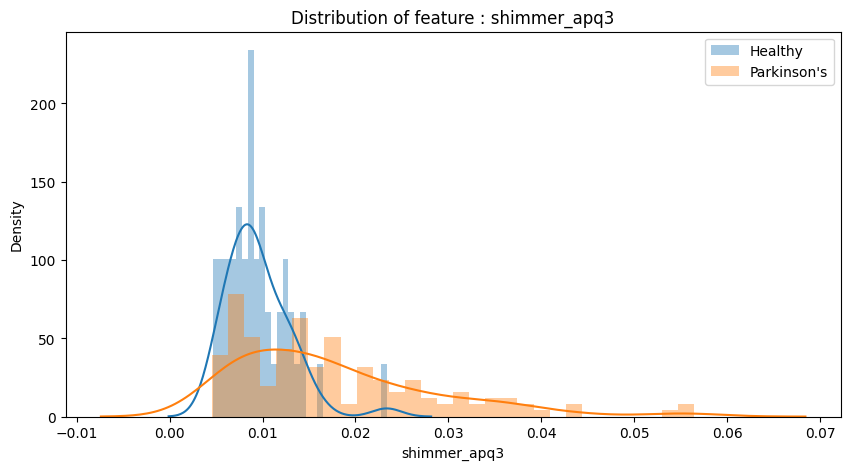

In [78]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                0           1
shimmer_apq3                       
0.00-0.01     41.095890   58.904110
0.01-0.02     23.611111   76.388889
0.02-0.03      3.333333   96.666667
0.03-0.04      0.000000  100.000000
0.04-0.05      0.000000  100.000000
0.05-0.06      0.000000  100.000000


Text(0.5, 1.0, 'PD status with different shimmer_apq3 group')

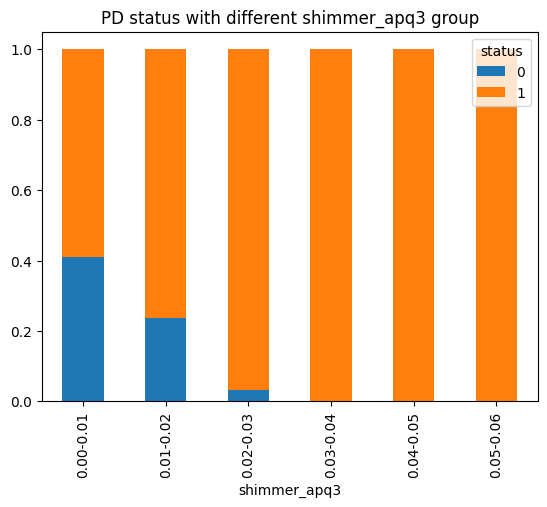

In [79]:
bins = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06]                                         # defining shimmer_apq3 bins,
# defining labels of shimmer_apq3 groups as per bins defined as above
shimmer_apq3_group = ['0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05', '0.05-0.06']
pdData_shimmer_apq3_bin = pd.cut(pdData[feature],bins,labels=shimmer_apq3_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to shimmer_apq3_group_col variable
shimmer_apq3_group_col = pd.crosstab(pdData_shimmer_apq3_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(shimmer_apq3_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
shimmer_apq3_group_col.div(shimmer_apq3_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different shimmer_apq3 group")                     # setting title of the figure

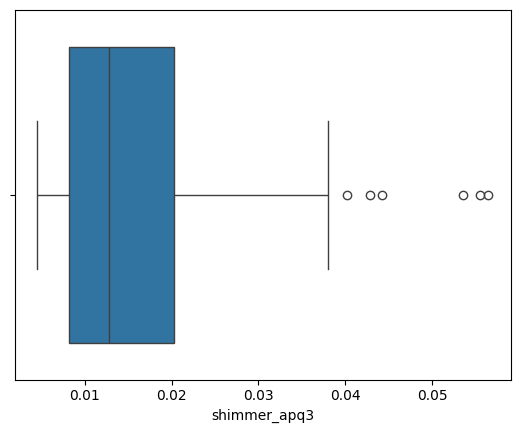

In [80]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [81]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature shimmer_apq3 : Mean = 0.015664, Median = 0.01279 and Inter-Quartile-Range (IQR) = 0.01202

*****************************************************************************************************************************
There are 6 outliers (3.077 % of the data points) in shimmer_apq3 feature and the values are [0.04421, 0.05358, 0.05551, 0.04016, 0.05647, 0.04284]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='shimmer_apq3'>

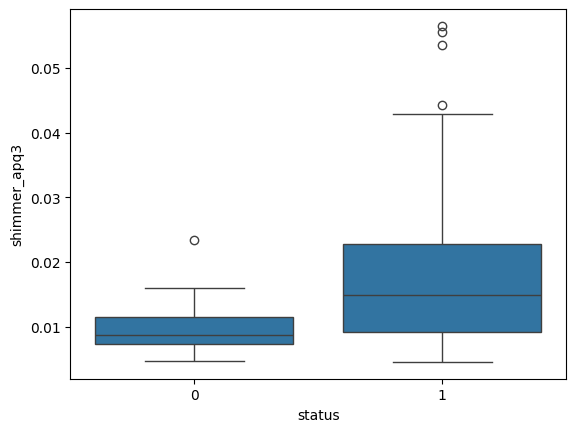

In [82]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

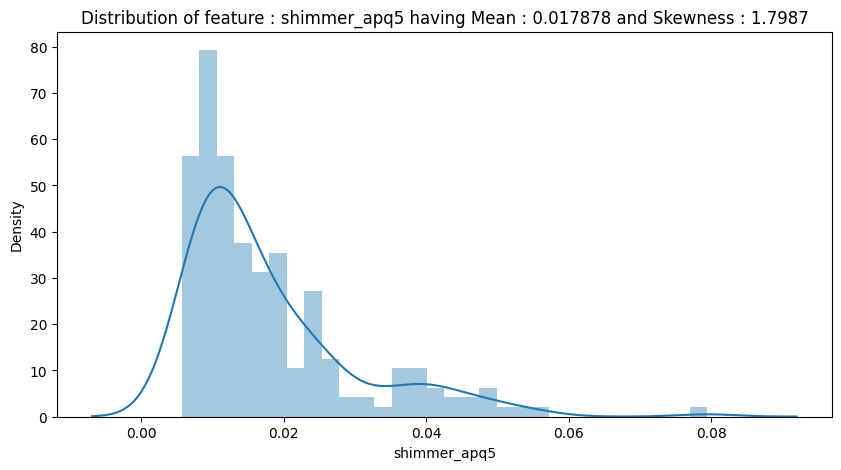

In [83]:
feature = 'shimmer_apq5'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

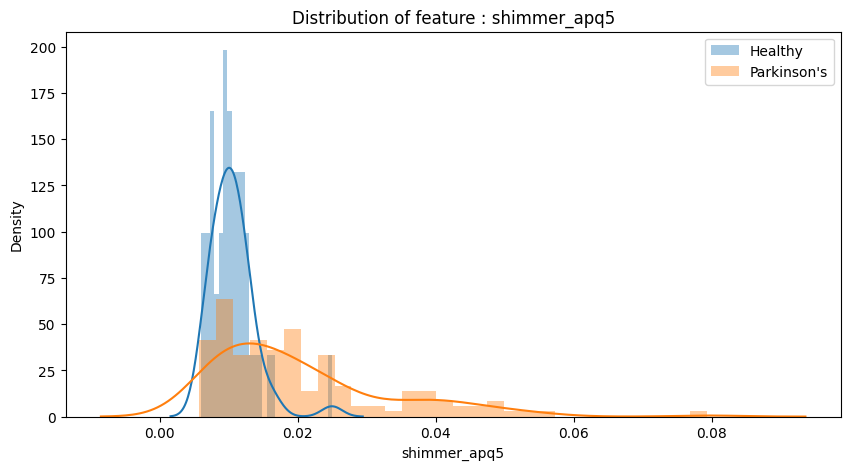

In [84]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status                0           1
shimmer_apq5                       
0.00-0.01     41.818182   58.181818
0.01-0.02     27.906977   72.093023
0.02-0.03      3.846154   96.153846
0.03-0.04      0.000000  100.000000
0.04-0.05      0.000000  100.000000
0.05-0.06      0.000000  100.000000
0.06-0.08      0.000000  100.000000


Text(0.5, 1.0, 'PD status with different shimmer_apq5 group')

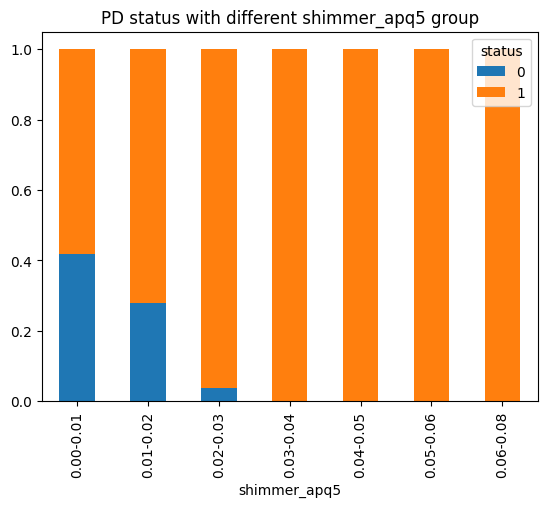

In [85]:
bins = [0.00, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08]                                         # defining shimmer_apq5 bins,
# defining labels of shimmer_apq5 groups as per bins defined as above
shimmer_apq5_group = ['0.00-0.01', '0.01-0.02', '0.02-0.03', '0.03-0.04', '0.04-0.05', '0.05-0.06', '0.06-0.08']
pdData_shimmer_apq5_bin = pd.cut(pdData[feature],bins,labels=shimmer_apq5_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to shimmer_apq5_group_col variable
shimmer_apq5_group_col = pd.crosstab(pdData_shimmer_apq5_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(shimmer_apq5_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
shimmer_apq5_group_col.div(shimmer_apq5_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different shimmer_apq5 group")                     # setting title of the figure

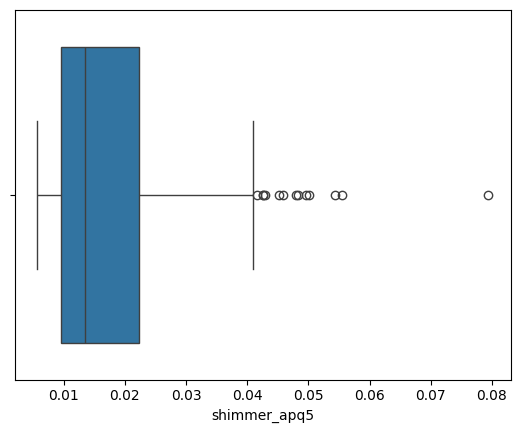

In [86]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [87]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature shimmer_apq5 : Mean = 0.017878, Median = 0.01347 and Inter-Quartile-Range (IQR) = 0.0128

*****************************************************************************************************************************
There are 13 outliers (6.667 % of the data points) in shimmer_apq5 feature and the values are [0.04518, 0.04825, 0.04159, 0.04254, 0.04282, 0.04962, 0.04791, 0.05005, 0.05426, 0.0458, 0.04265, 0.0794, 0.05556]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='shimmer_apq5'>

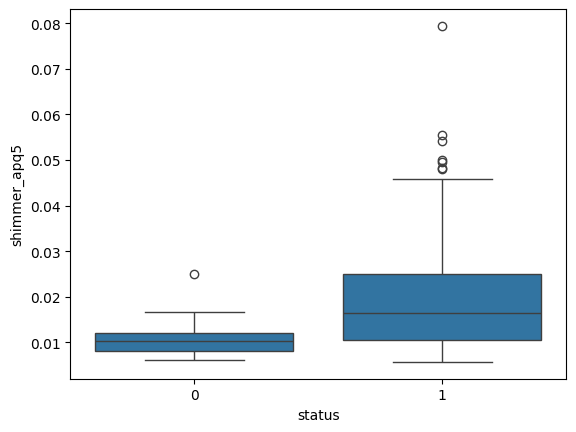

In [88]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

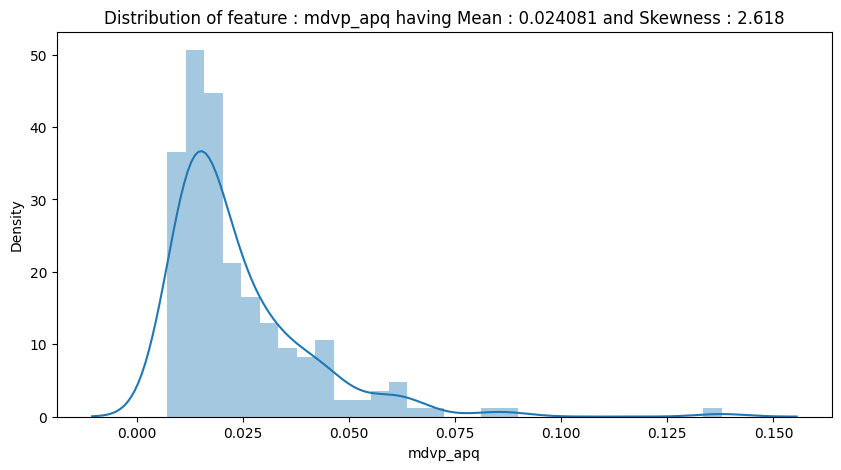

In [89]:
feature = 'mdvp_apq'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

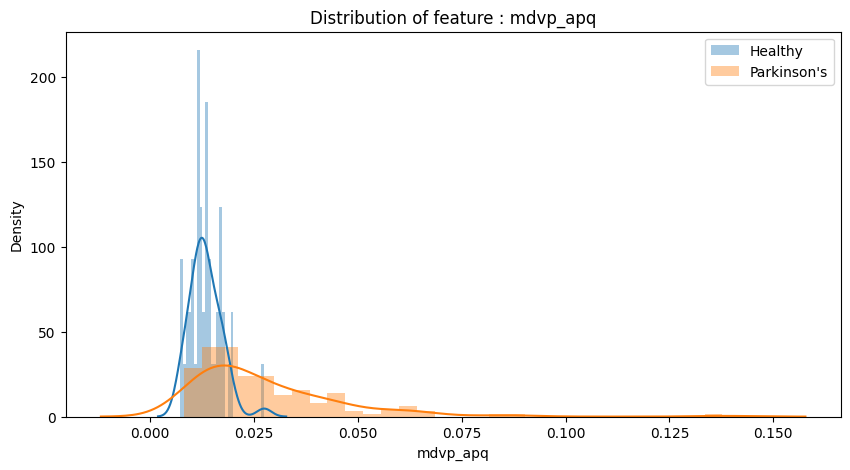

In [90]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status             0           1
mdvp_apq                        
0.00-0.02  42.727273   57.272727
0.02-0.04   1.754386   98.245614
0.04-0.06   0.000000  100.000000
0.06-0.08   0.000000  100.000000
0.08-0.10   0.000000  100.000000
0.10-0.14   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different mdvp_apq group')

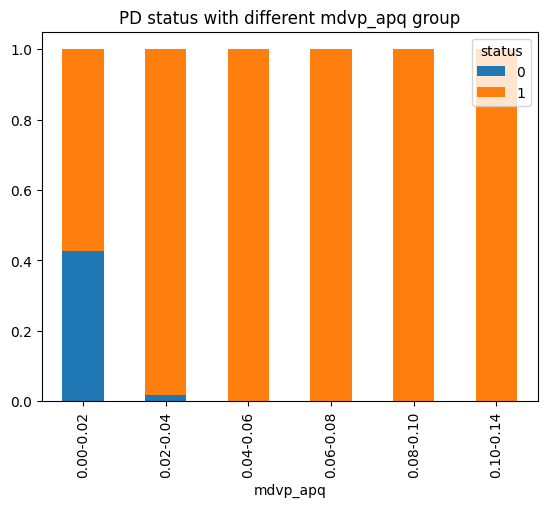

In [91]:
bins = [0.00, 0.02, 0.04, 0.06, 0.08, 0.10, 0.14]                                         # defining mdvp_apq bins,
# defining labels of mdvp_apq groups as per bins defined as above
mdvp_apq_group = ['0.00-0.02', '0.02-0.04', '0.04-0.06', '0.06-0.08', '0.08-0.10', '0.10-0.14']
pdData_mdvp_apq_bin = pd.cut(pdData[feature],bins,labels=mdvp_apq_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to mdvp_apq_group_col variable
mdvp_apq_group_col = pd.crosstab(pdData_mdvp_apq_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(mdvp_apq_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
mdvp_apq_group_col.div(mdvp_apq_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different mdvp_apq group")                     # setting title of the figure

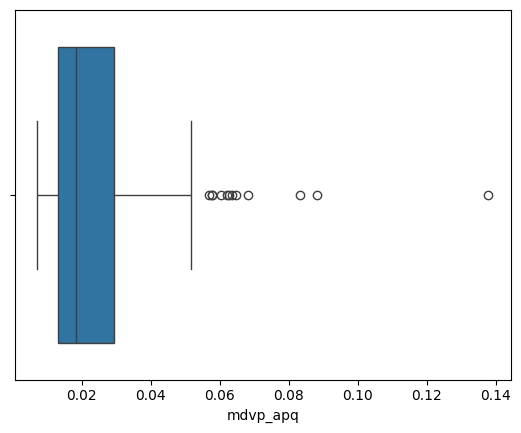

In [92]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [93]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_apq : Mean = 0.024081, Median = 0.01826 and Inter-Quartile-Range (IQR) = 0.01632

*****************************************************************************************************************************
There are 12 outliers (6.154 % of the data points) in mdvp_apq feature and the values are [0.05767, 0.0569, 0.05783, 0.06196, 0.06023, 0.08808, 0.06359, 0.06824, 0.0646, 0.06259, 0.13778, 0.08318]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='mdvp_apq'>

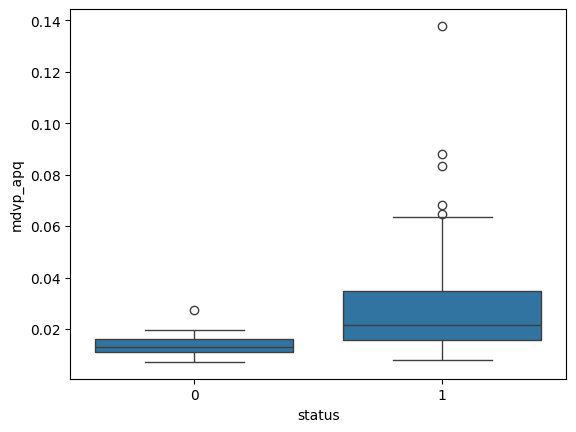

In [94]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

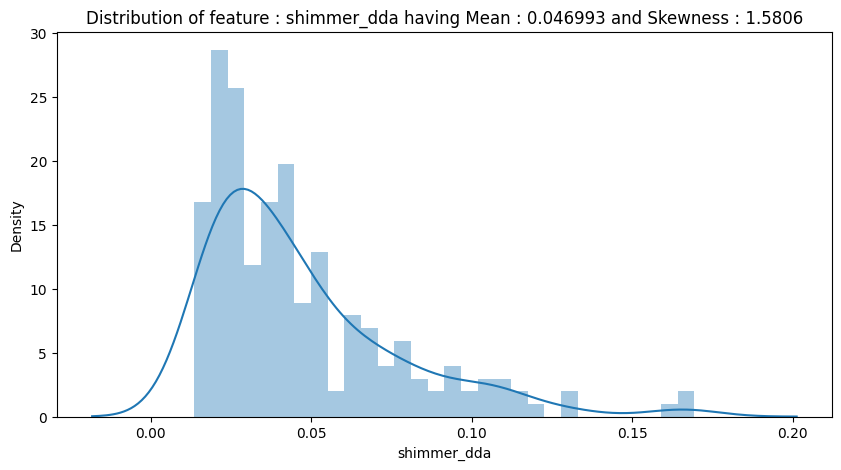

In [95]:
feature = 'shimmer_dda'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

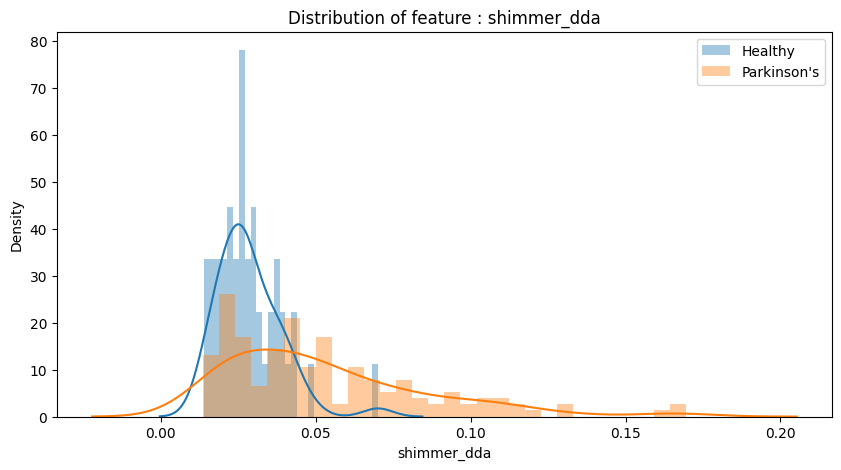

In [96]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status               0           1
shimmer_dda                       
0.010-0.025  37.254902   62.745098
0.025-0.050  35.000000   65.000000
0.050-0.075   3.030303   96.969697
0.075-0.100   0.000000  100.000000
0.100-0.125   0.000000  100.000000
0.125-0.150   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different shimmer_dda group')

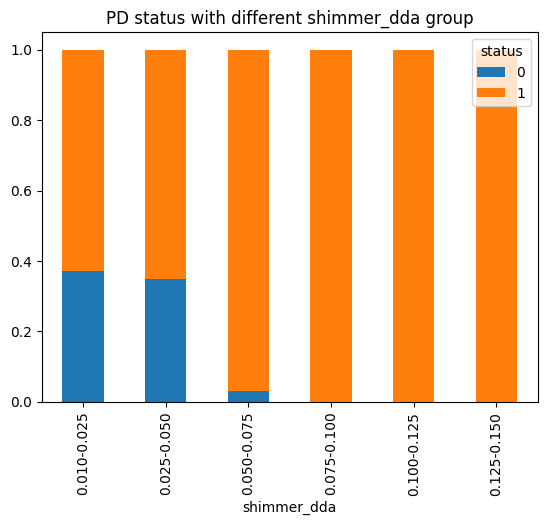

In [97]:
bins = [0.010, 0.025, 0.050, 0.075, 0.100, 0.125, 0.150]                                         # defining shimmer_dda bins,
# defining labels of shimmer_dda groups as per bins defined as above
shimmer_dda_group = ['0.010-0.025', '0.025-0.050', '0.050-0.075', '0.075-0.100', '0.100-0.125', '0.125-0.150']
pdData_shimmer_dda_bin = pd.cut(pdData[feature],bins,labels=shimmer_dda_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to shimmer_dda_group_col variable
shimmer_dda_group_col = pd.crosstab(pdData_shimmer_dda_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(shimmer_dda_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
shimmer_dda_group_col.div(shimmer_dda_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different shimmer_dda group")                     # setting title of the figure

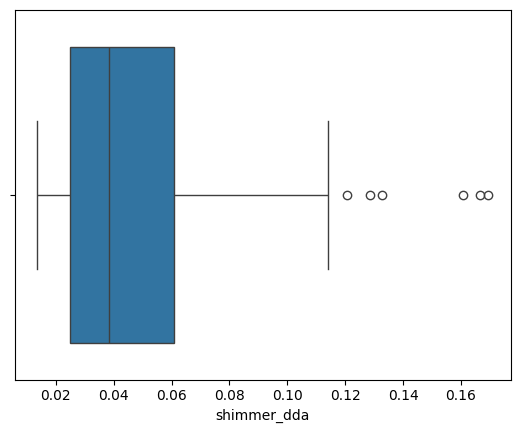

In [98]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [99]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature shimmer_dda : Mean = 0.046993, Median = 0.03836 and Inter-Quartile-Range (IQR) = 0.03606

*****************************************************************************************************************************
There are 6 outliers (3.077 % of the data points) in shimmer_dda feature and the values are [0.13262, 0.16074, 0.16654, 0.12047, 0.16942, 0.12851]
*****************************************************************************************************************************


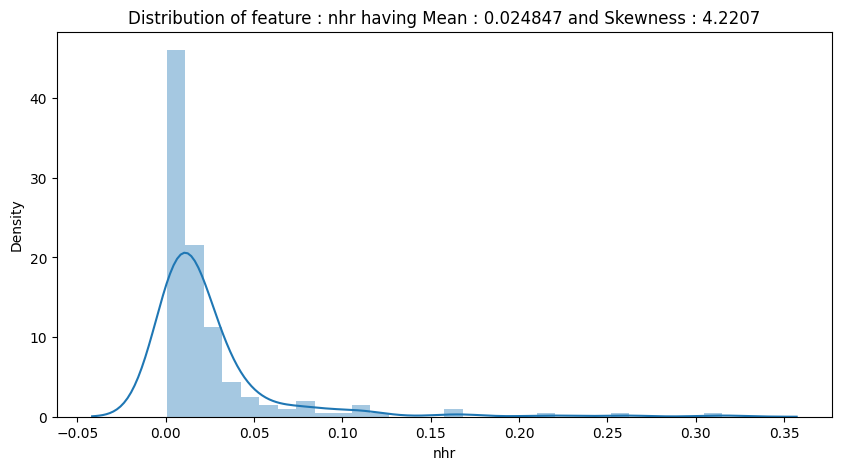

In [100]:
feature = 'nhr'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

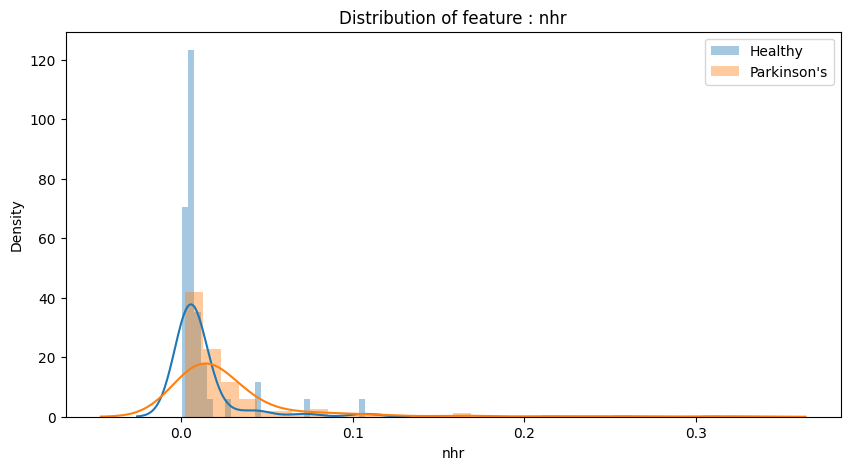

In [101]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status             0           1
nhr                             
0.00-0.05  26.285714   73.714286
0.05-0.10  10.000000   90.000000
0.10-0.15  20.000000   80.000000
0.15-0.20   0.000000  100.000000
0.20-0.25   0.000000  100.000000
0.25-0.32   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different nhr group')

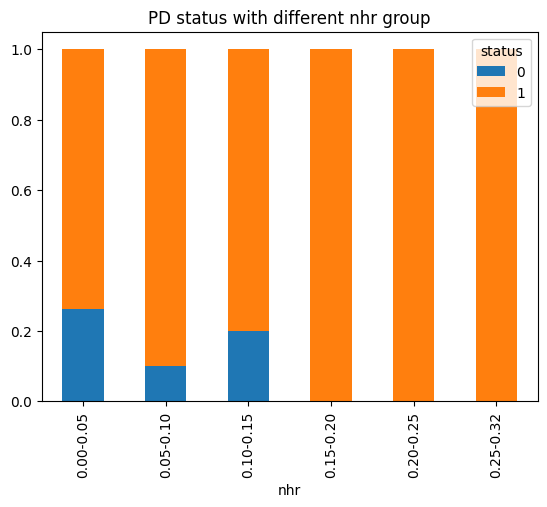

In [102]:
bins = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.32]                                         # defining nhr bins,
# defining labels of nhr groups as per bins defined as above
nhr_group = ['0.00-0.05', '0.05-0.10', '0.10-0.15', '0.15-0.20', '0.20-0.25', '0.25-0.32']
pdData_nhr_bin = pd.cut(pdData[feature],bins,labels=nhr_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to nhr_group_col variable
nhr_group_col = pd.crosstab(pdData_nhr_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(nhr_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
nhr_group_col.div(nhr_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different nhr group")                     # setting title of the figure

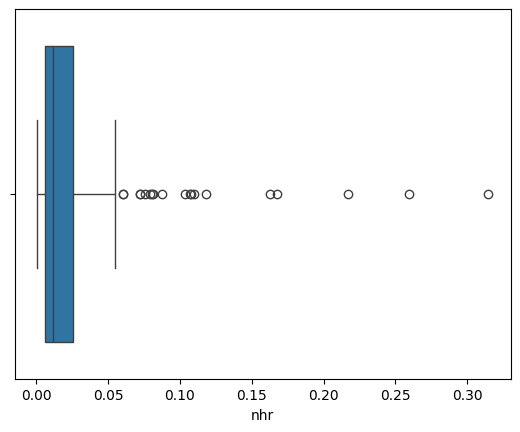

In [103]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [104]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature nhr : Mean = 0.024847, Median = 0.01166 and Inter-Quartile-Range (IQR) = 0.019715

*****************************************************************************************************************************
There are 19 outliers (9.744 % of the data points) in nhr feature and the values are [0.07223, 0.08725, 0.08151, 0.10323, 0.16744, 0.31482, 0.11843, 0.2593, 0.06051, 0.0753, 0.06057, 0.08069, 0.07889, 0.10952, 0.21713, 0.16265, 0.10748, 0.10715, 0.07223]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='nhr'>

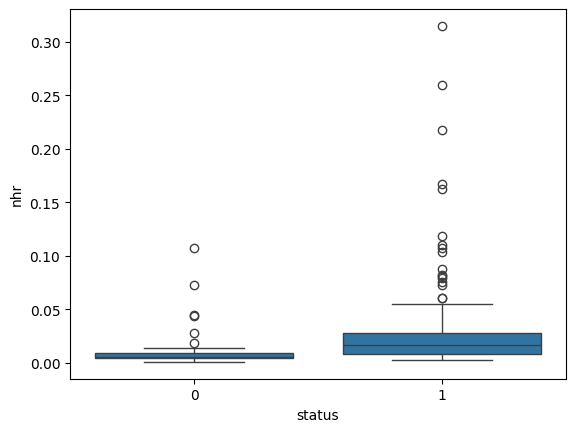

In [105]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

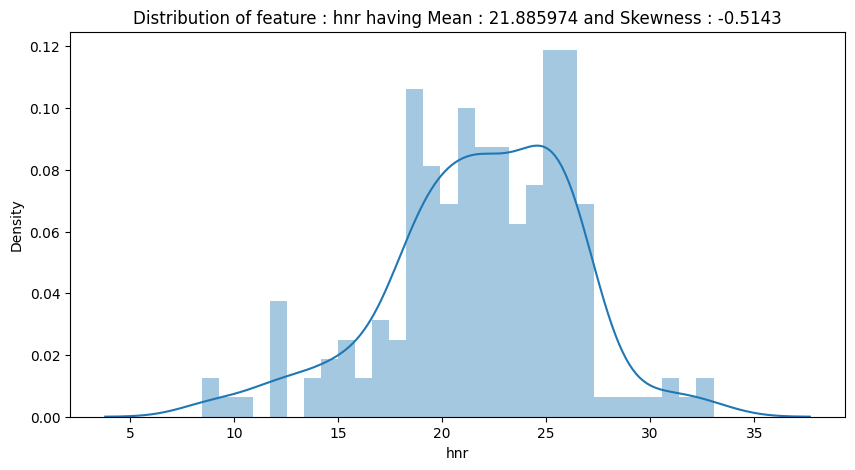

In [106]:
feature = 'hnr'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

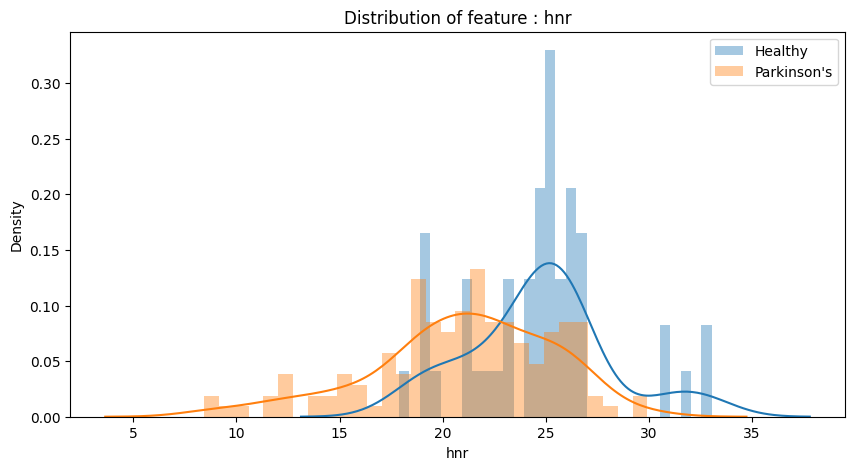

In [107]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status           0           1
hnr                           
8-10      0.000000  100.000000
10-15     0.000000  100.000000
15-20    13.043478   86.956522
20-25    22.222222   77.777778
25-30    39.583333   60.416667
30-34   100.000000    0.000000


Text(0.5, 1.0, 'PD status with different hnr group')

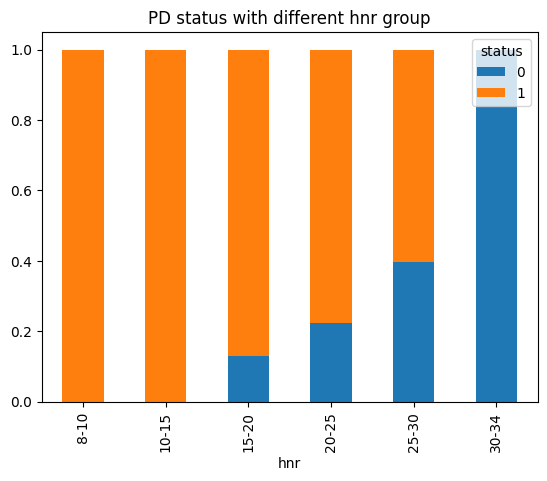

In [108]:
bins = [8, 10, 15, 20, 25 , 30, 34]                                         # defining hnr bins,
# defining labels of hnr groups as per bins defined as above
hnr_group = ['8-10', '10-15', '15-20', '20-25', '25-30', '30-34']
pdData_hnr_bin = pd.cut(pdData[feature],bins,labels=hnr_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to hnr_group_col variable
hnr_group_col = pd.crosstab(pdData_hnr_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(hnr_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
hnr_group_col.div(hnr_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different hnr group")                     # setting title of the figure

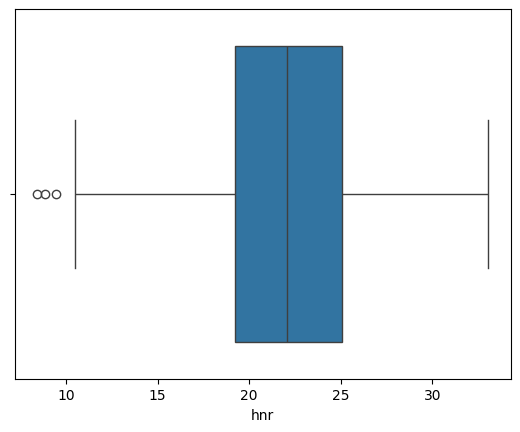

In [109]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [110]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature hnr : Mean = 21.885974, Median = 22.085 and Inter-Quartile-Range (IQR) = 5.8775

*****************************************************************************************************************************
There are 3 outliers (1.538 % of the data points) in hnr feature and the values are [8.867, 8.441, 9.449]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='hnr'>

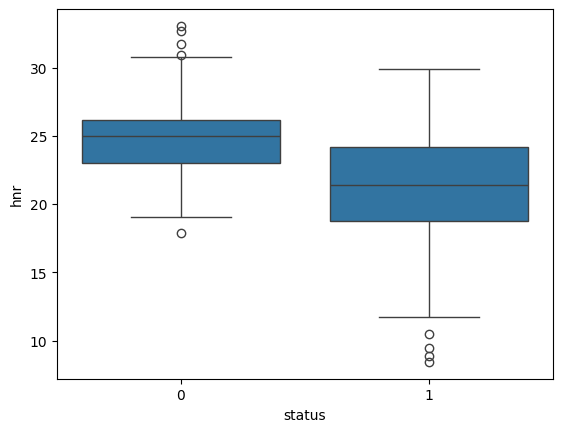

In [111]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

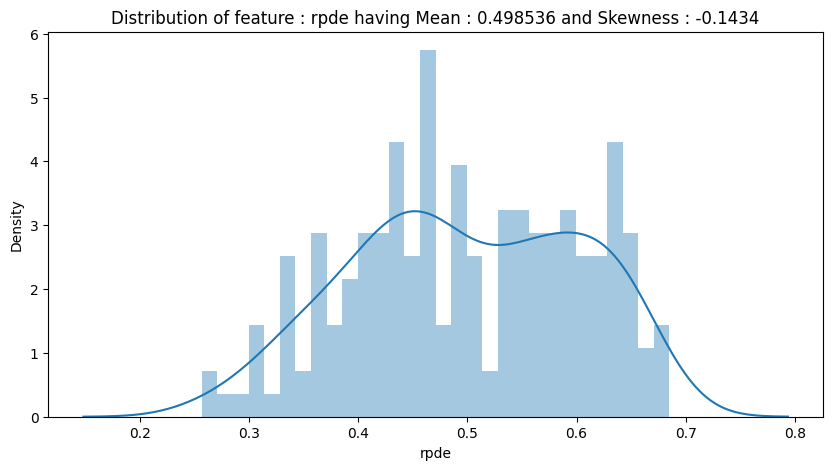

In [112]:
feature = 'rpde'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

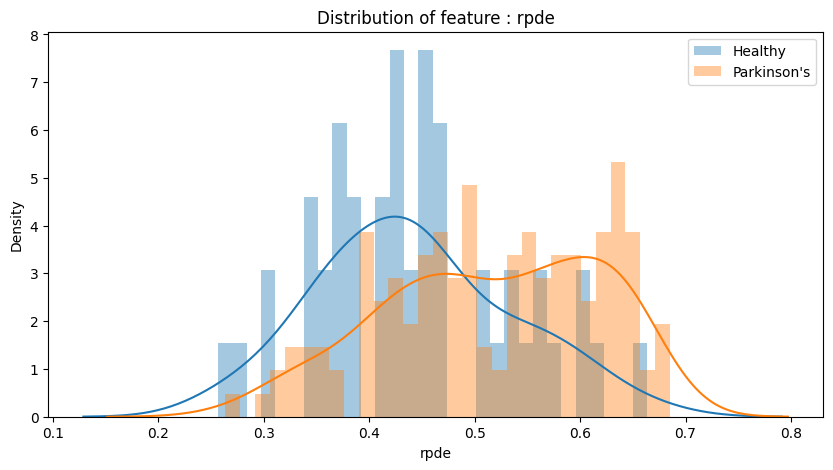

In [113]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status             0          1
rpde                           
0.25-0.35  41.176471  58.823529
0.35-0.45  41.176471  58.823529
0.45-0.55  21.428571  78.571429
0.55-0.65  11.864407  88.135593
0.65-0.75   8.333333  91.666667


Text(0.5, 1.0, 'PD status with different rpde group')

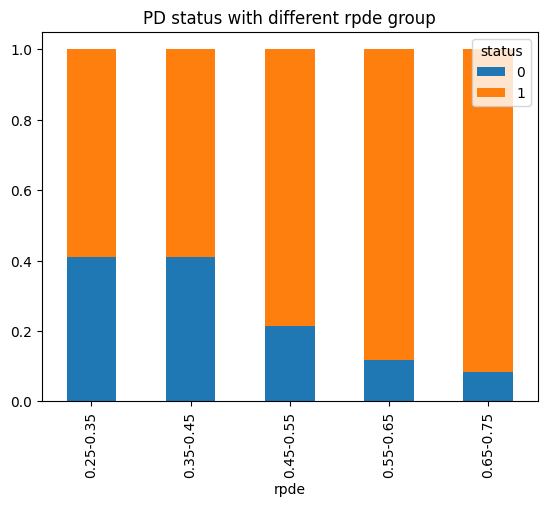

In [114]:
bins = [0.25, 0.35, 0.45, 0.55, 0.65, 0.75]                                         # defining rpde bins,
# defining labels of rpde groups as per bins defined as above
rpde_group = ['0.25-0.35', '0.35-0.45', '0.45-0.55', '0.55-0.65', '0.65-0.75']
pdData_rpde_bin = pd.cut(pdData[feature],bins,labels=rpde_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to rpde_group_col variable
rpde_group_col = pd.crosstab(pdData_rpde_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(rpde_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
rpde_group_col.div(rpde_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different rpde group")                     # setting title of the figure

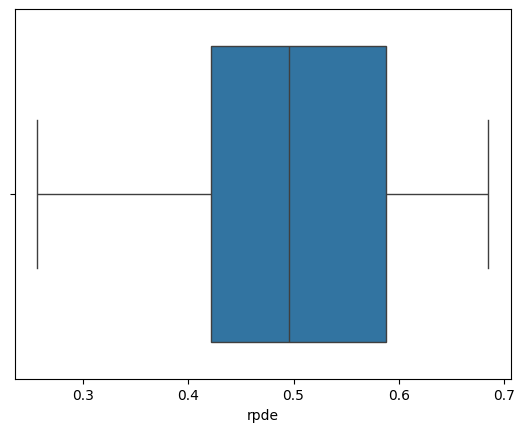

In [115]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='rpde'>

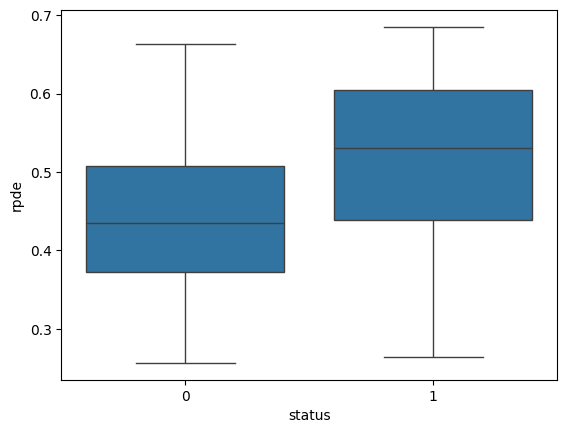

In [116]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

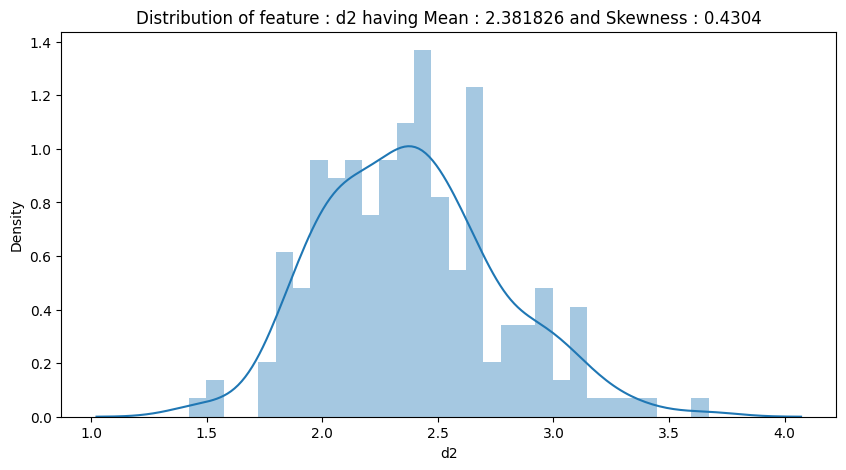

In [117]:
feature = 'd2'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

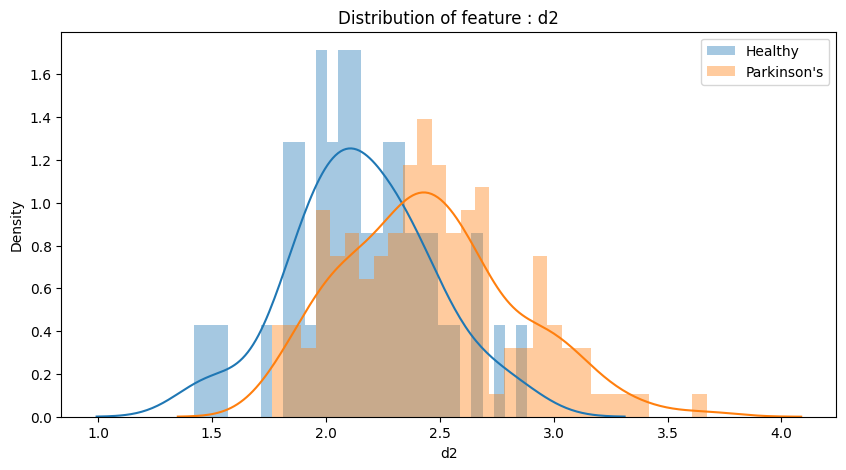

In [118]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status            0           1
d2                             
1.0-1.5  100.000000    0.000000
1.5-2.0   44.444444   55.555556
2.0-2.5   29.411765   70.588235
2.5-3.0    9.615385   90.384615
3.0-3.7    0.000000  100.000000


Text(0.5, 1.0, 'PD status with different d2 group')

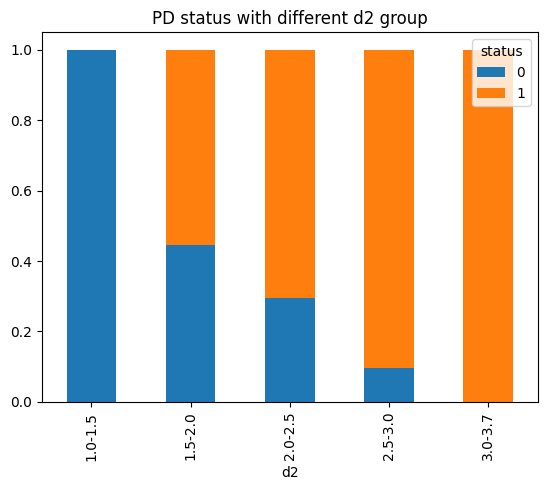

In [119]:
bins = [1.0, 1.5, 2.0, 2.5, 3.0, 3.7]                                         # defining d2 bins,
# defining labels of d2 groups as per bins defined as above
d2_group = ['1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.7']
pdData_d2_bin = pd.cut(pdData[feature],bins,labels=d2_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to d2_group_col variable
d2_group_col = pd.crosstab(pdData_d2_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(d2_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
d2_group_col.div(d2_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different d2 group")                     # setting title of the figure

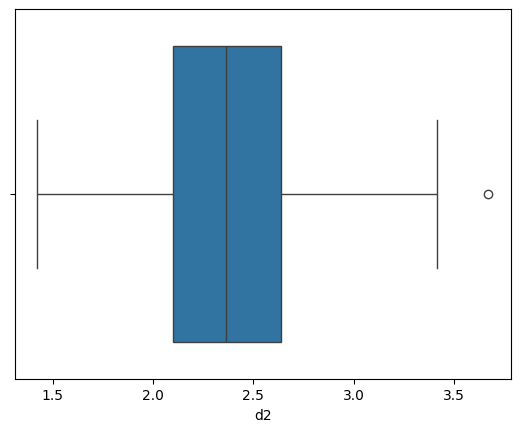

In [120]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [121]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature d2 : Mean = 2.381826, Median = 2.361532 and Inter-Quartile-Range (IQR) = 0.53733

*****************************************************************************************************************************
There are 1 outliers (0.513 % of the data points) in d2 feature and the values are [3.671155]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='d2'>

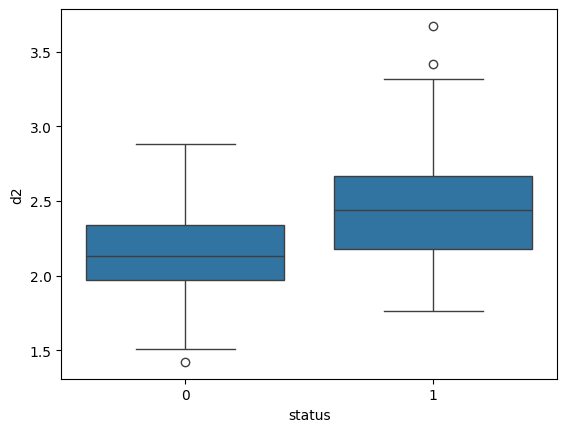

In [122]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

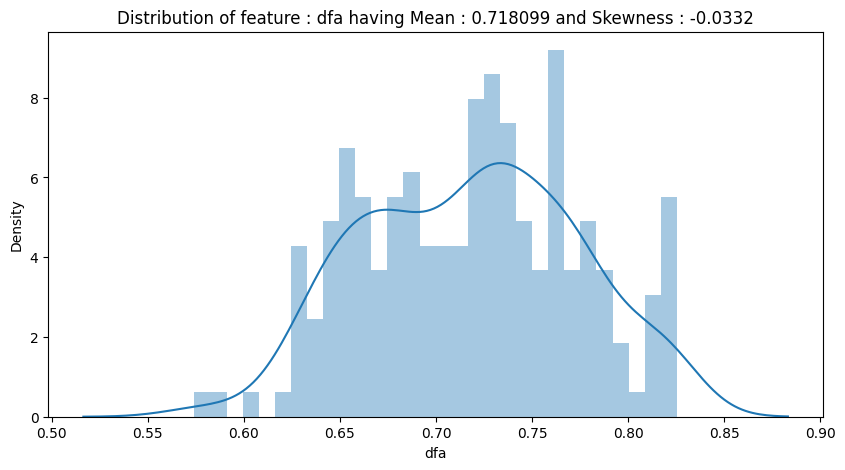

In [123]:
feature = 'dfa'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

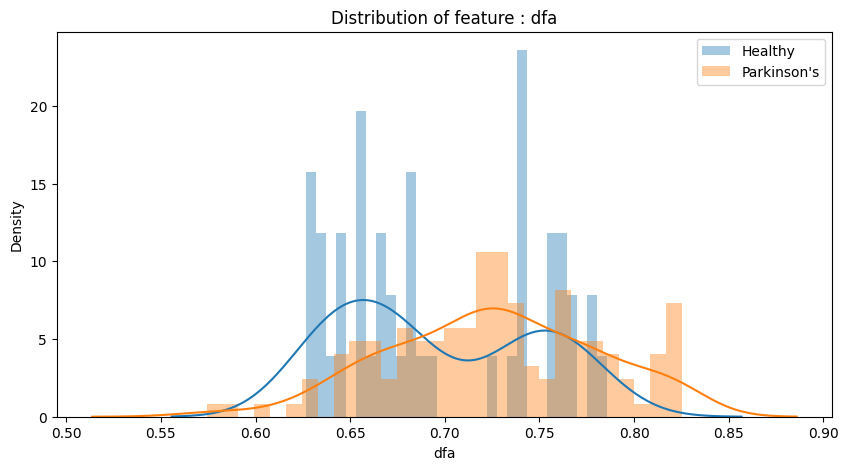

In [124]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status           0           1
dfa                           
0.5-0.6   0.000000  100.000000
0.6-0.7  39.189189   60.810811
0.7-0.8  18.269231   81.730769
0.8-0.9   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different dfa group')

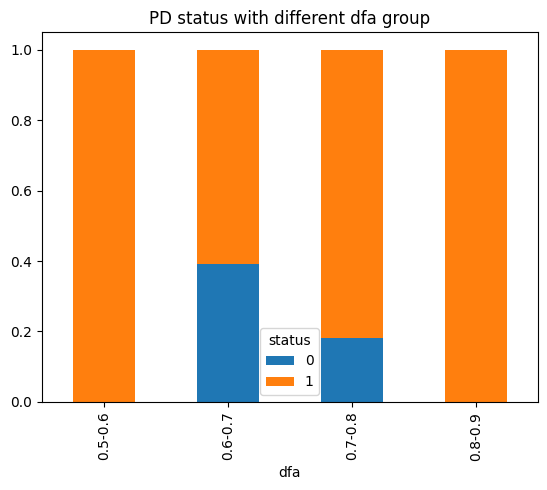

In [125]:
bins = [0.5, 0.6, 0.7, 0.8, 0.9]                                         # defining dfa bins,
# defining labels of dfa groups as per bins defined as above
dfa_group = ['0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9']
pdData_dfa_bin = pd.cut(pdData[feature],bins,labels=dfa_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to dfa_group_col variable
dfa_group_col = pd.crosstab(pdData_dfa_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(dfa_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
dfa_group_col.div(dfa_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different dfa group")                     # setting title of the figure

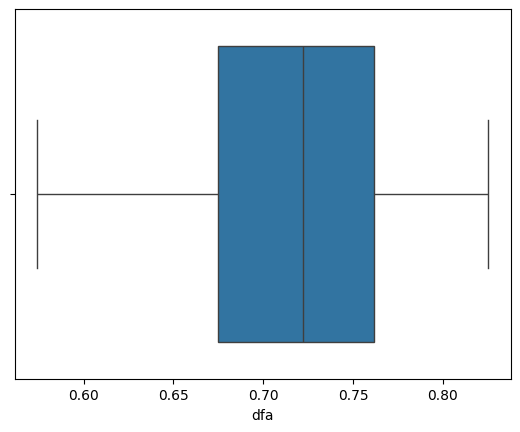

In [126]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

<Axes: xlabel='status', ylabel='dfa'>

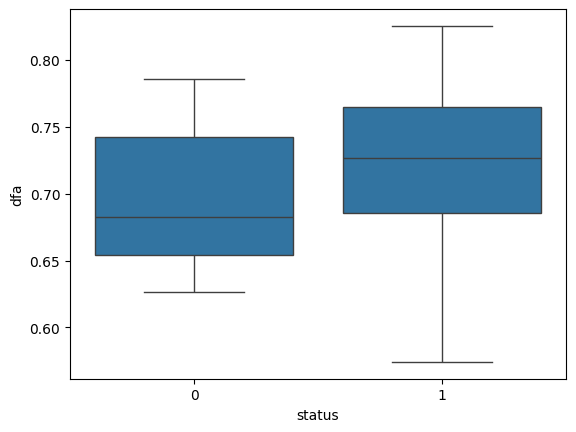

In [127]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

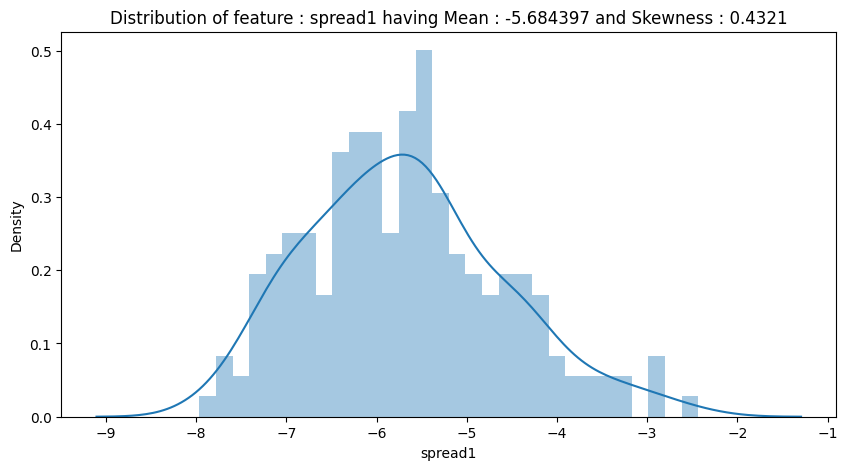

In [128]:
feature = 'spread1'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

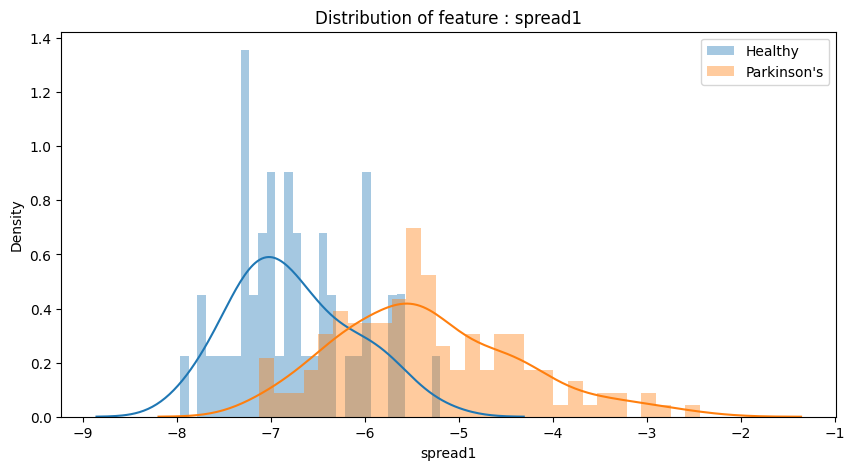

In [129]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn distplot to examine distribution of the feature of healthy patient
fig = sns.distplot(pdData[pdData['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn distplot to examine distribution of the feature of Parkinson's patient
fig = sns.distplot(pdData[pdData['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

status           0           1
spread1                       
-8 : -6  50.617284   49.382716
-6 : -4   6.930693   93.069307
-4 : -2   0.000000  100.000000


Text(0.5, 1.0, 'PD status with different spread1 group')

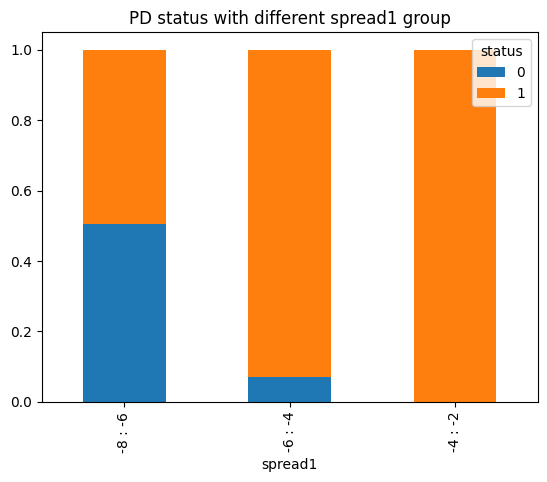

In [130]:
bins = [-8,-6,-4,-2]                                         # defining spread1 bins,
# defining labels of spread1 groups as per bins defined as above
spread1_group = ['-8 : -6', '-6 : -4', '-4 : -2']
pdData_spread1_bin = pd.cut(pdData[feature],bins,labels=spread1_group)  # segmenting data as per bins defined

# putting into pandas crosstab and applying lambda function to take percentage and assigning to spread1_group_col variable
spread1_group_col = pd.crosstab(pdData_spread1_bin,pdData.status).apply(lambda r: r/r.sum()*100, axis=1)
print(spread1_group_col)                                                    # printing above crosstab

# plotting a stacked bar chart to show PD status for different mdvp_fo_hz group
spread1_group_col.div(spread1_group_col.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.title("PD status with different spread1 group")                     # setting title of the figure

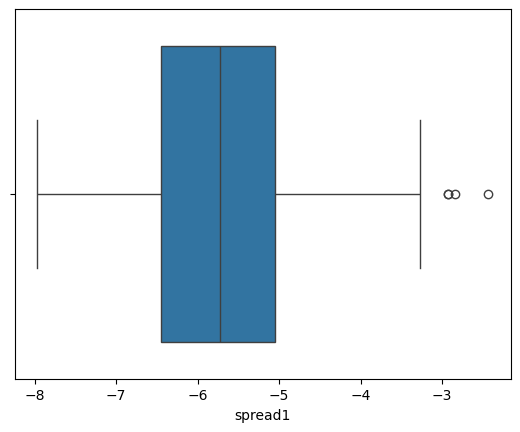

In [131]:
ax = sns.boxplot(x=pdData[feature])        # seaborn boxplot to examine outliers of the feature

In [132]:
Q1 = pdData[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = pdData[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = pdData[((pdData[feature] < (Q1 - 1.5 * IQR)) |(pdData[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(pdData[feature]),6),round(np.median(pdData[feature]),6),round(IQR,6))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/pdData[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature spread1 : Mean = -5.684397, Median = -5.720868 and Inter-Quartile-Range (IQR) = 1.403904

*****************************************************************************************************************************
There are 4 outliers (2.051 % of the data points) in spread1 feature and the values are [-2.93107, -2.434031, -2.839756, -2.929379]
*****************************************************************************************************************************


<Axes: xlabel='status', ylabel='spread1'>

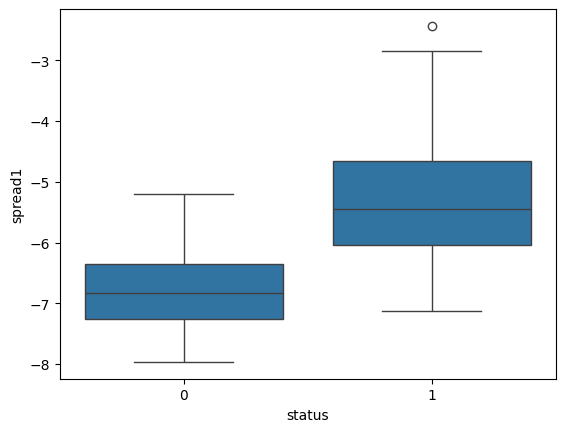

In [133]:
sns.boxplot(x=pdData['status'],y=pdData[feature])

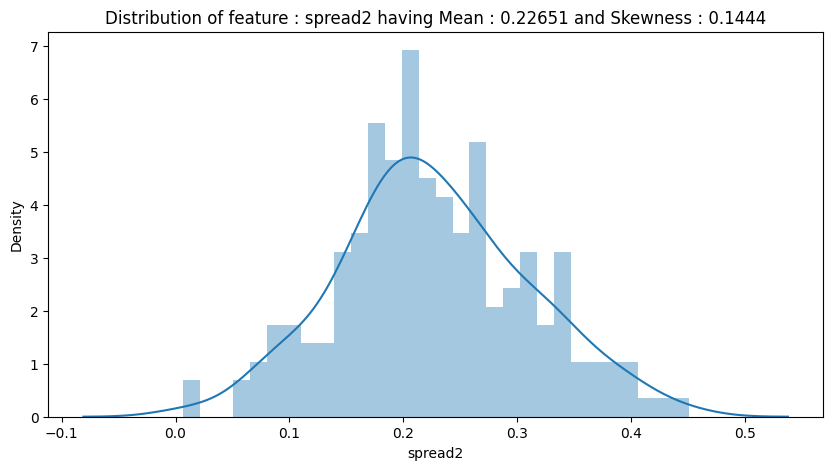

In [134]:
feature = 'spread2'
meanData = 'Mean : ' + str(round(pdData[feature].mean(),6))        # variable to contain mean of the attribute
skewData = 'Skewness : ' + str(round(pdData[feature].skew(),4))    # variable to contain skewness of the attribute
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
fig = sns.distplot(pdData[feature], bins=30, kde=True)             # seaborn distplot to examine distribution of the feature
plt.title("Distribution of feature : "+feature+" having "+meanData+" and "+skewData)   # setting title of the figure
plt.show()

<Figure size 1000x500 with 0 Axes>

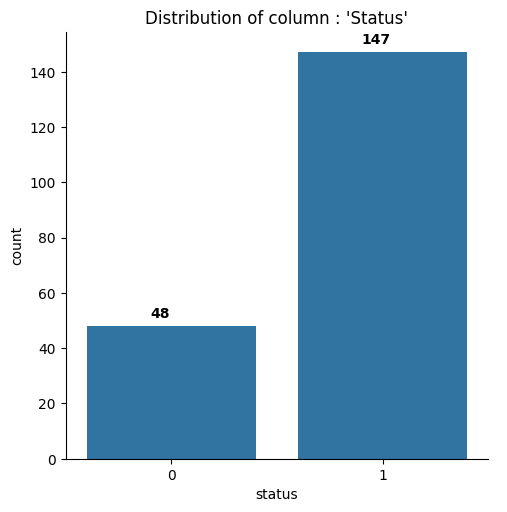

In [135]:
plt.figure(figsize=(10,5))                                 # setting figure size with width = 10 and height = 5
# seaborn count catplot to examine distribution of the status
ax = sns.catplot(x='status', kind="count", data=pdData)
plt.title("Distribution of column : 'Status'")      # setting title of the figure
y = []                                                     # creating a null or empty array
for val in range(pdData.status.nunique()):        # looping for number of unique values in the status
    # appending count of each unique values from status to array y
    y.append(pdData.groupby(pdData.status,sort=False)['status'].count()[val])
for i, v in enumerate(y):                                  # looping count of each unique value in the status
    # including count of each unique values in the plot
    plt.annotate(str(v), xy=(i,float(v)), xytext=(i-0.1, v+3), color='black', fontweight='bold')

Text(0.5, 1.0, "Distribution of column : 'status'")

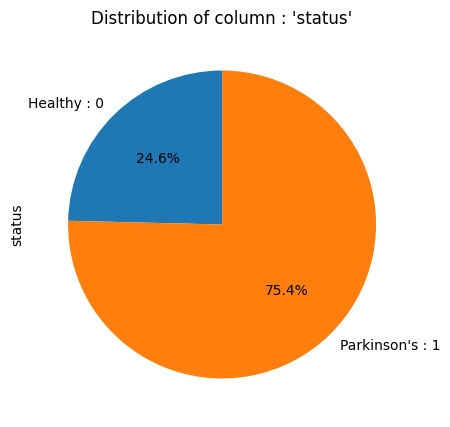

In [136]:
plt.figure(figsize=(5,5))                               # setting figure size with width = 10 and height = 5
# seaborn pie chart to examine distribution of the status
pdData.groupby(['status']).status.count().plot(kind='pie',labels=['Healthy : 0','Parkinson\'s : 1'],
                                                               startangle=90, autopct='%1.1f%%')
plt.title("Distribution of column : 'status'")   # setting title of the figure

In [137]:
sns.pairplot(pdData,hue='status',diag_kind='hist')

Error in callback <function flush_figures at 0x786dce22c040> (for post_execute):


KeyboardInterrupt: 

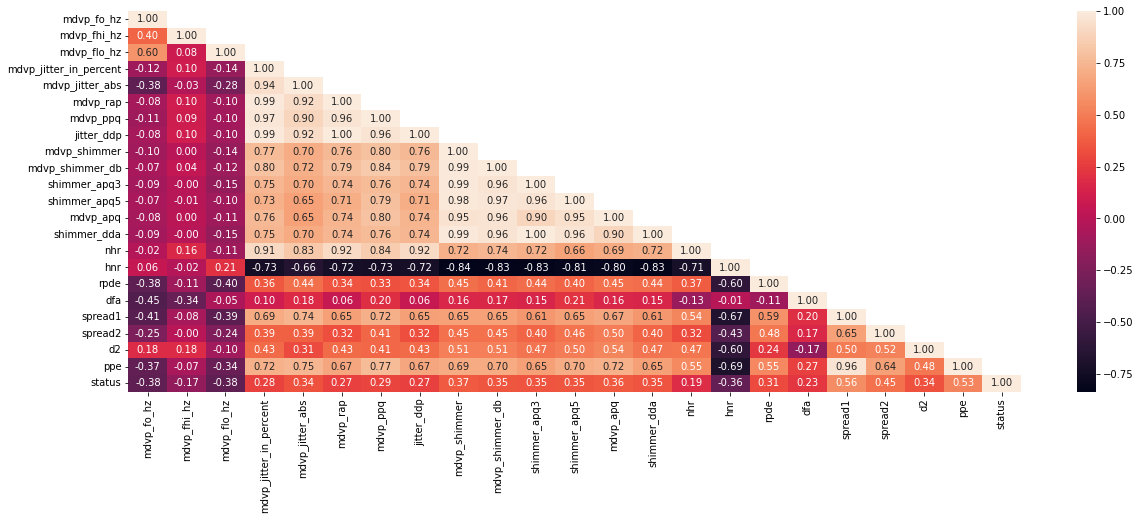

In [ ]:
plt.figure(figsize=(20,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(pdData.corr())
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(pdData.corr(),mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)

In [138]:
#Split the data into training and test set in the ratio of 70:30 respectively
X = pdData.drop(['status'],axis=1)
y = pdData['status']

# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# checking the dimensions of the train & test subset
# printing dimension of train set
print(X_train.shape)
# printing dimension of test set
print(X_test.shape)

(136, 22)
(59, 22)


In [139]:
X_train.drop(['mdvp_jitter_in_percent'],axis=1,inplace=True)
X_test.drop(['mdvp_jitter_in_percent'],axis=1,inplace=True)

In [140]:
X_train.drop(['mdvp_shimmer'],axis=1,inplace=True)
X_test.drop(['mdvp_shimmer'],axis=1,inplace=True)

In [141]:
X_train.drop(['hnr'],axis=1,inplace=True)
X_test.drop(['hnr'],axis=1,inplace=True)

In [143]:

print(X_train.shape)
# printing dimension of test set
print(X_test.shape)

(136, 19)
(59, 19)


In [144]:
# Let us scale train as well as test data using StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

A. Logistic Regression:

In [145]:
# Train and Fit model
lr = LogisticRegression(random_state=0)
lr.fit(X_train_scaled, y_train)

#predict status for X_test_scaled dataset
lr_y_pred = lr.predict(X_test_scaled)

# Confusion Matrix for the Logistic Regression Model
print("Confusion Matrix : Logistic Regression")
print(confusion_matrix(y_test,lr_y_pred))

# Classification Report for the Logistic Regression Model
classRep = classification_report(y_test, lr_y_pred, digits=2)
print(classRep)

Confusion Matrix : Logistic Regression
[[ 9  4]
 [ 4 42]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.91      0.91      0.91        46

    accuracy                           0.86        59
   macro avg       0.80      0.80      0.80        59
weighted avg       0.86      0.86      0.86        59



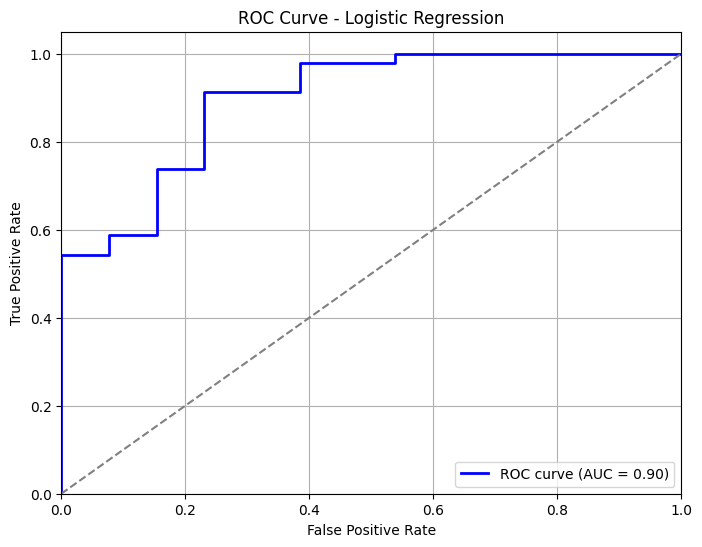

In [161]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability scores for the positive class
lr_y_prob = lr.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test, lr_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Confusion Matrix : SVM
[[ 8  5]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.90      1.00      0.95        46

    accuracy                           0.92        59
   macro avg       0.95      0.81      0.86        59
weighted avg       0.92      0.92      0.91        59



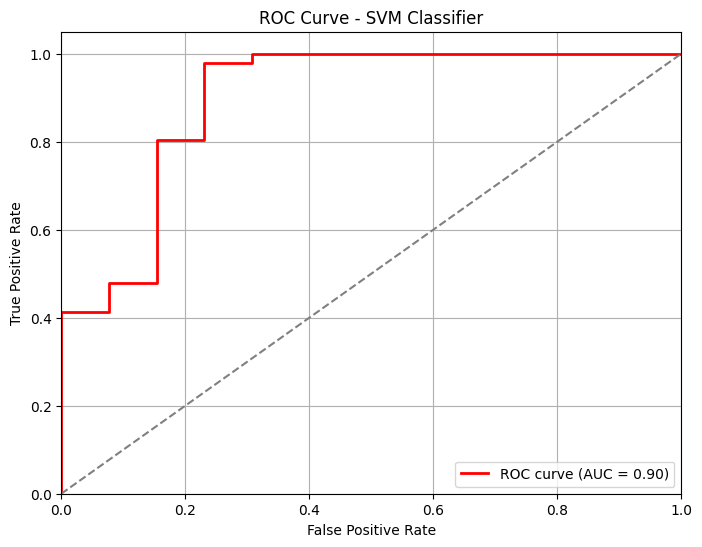

In [163]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Train the SVM Model with probability estimates enabled
svm = SVC(kernel='rbf', probability=True, random_state=0)
svm.fit(X_train_scaled, y_train)

# Predict status for X_test_scaled dataset
svm_y_pred = svm.predict(X_test_scaled)

# Confusion Matrix for SVM Model
print("Confusion Matrix : SVM")
print(confusion_matrix(y_test, svm_y_pred))

# Classification Report for SVM Model
classRep = classification_report(y_test, svm_y_pred, digits=2)
print(classRep)

# Compute ROC Curve and AUC
svm_y_prob = svm.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
fpr, tpr, _ = roc_curve(y_test, svm_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Confusion Matrix : Random Forest
[[ 9  4]
 [ 1 45]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.92      0.98      0.95        46

    accuracy                           0.92        59
   macro avg       0.91      0.84      0.86        59
weighted avg       0.91      0.92      0.91        59



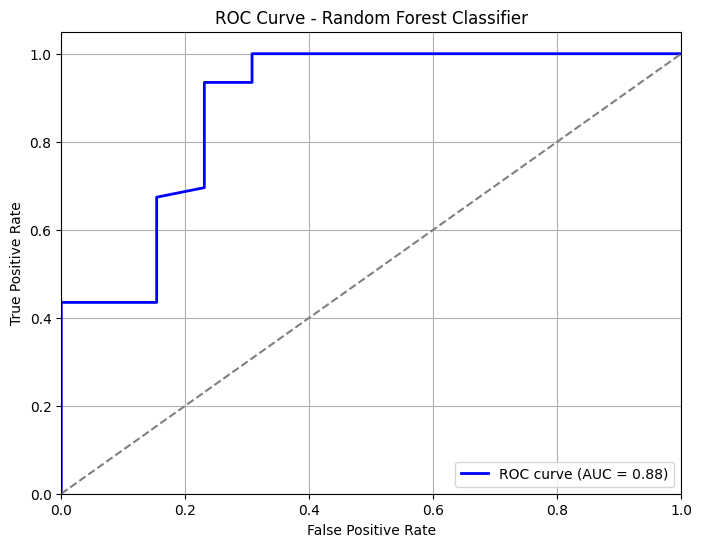

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Train the Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train_scaled, y_train)

# Predict status for X_test_scaled dataset
rf_y_pred = rf.predict(X_test_scaled)

# Confusion Matrix for Random Forest Model
print("Confusion Matrix : Random Forest")
print(confusion_matrix(y_test, rf_y_pred))

# Classification Report for Random Forest Model
classRep = classification_report(y_test, rf_y_pred, digits=2)
print(classRep)

# Compute ROC Curve and AUC
rf_y_prob = rf.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
fpr, tpr, _ = roc_curve(y_test, rf_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()



Confusion Matrix : Gradient Boosting
[[ 9  4]
 [ 2 44]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.92      0.96      0.94        46

    accuracy                           0.90        59
   macro avg       0.87      0.82      0.84        59
weighted avg       0.89      0.90      0.90        59



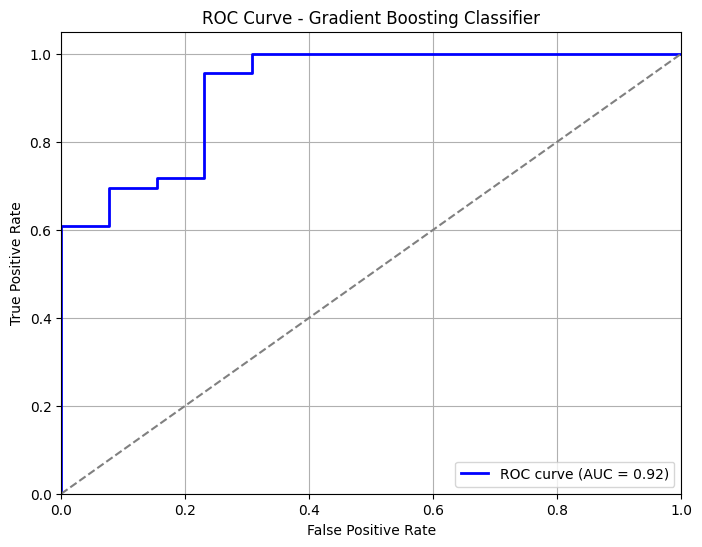

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Train the Gradient Boosting Model
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train_scaled, y_train)

# Predict status for X_test_scaled dataset
gb_y_pred = gb.predict(X_test_scaled)

# Confusion Matrix for Gradient Boosting Model
print("Confusion Matrix : Gradient Boosting")
print(confusion_matrix(y_test, gb_y_pred))

# Classification Report for Gradient Boosting Model
classRep = classification_report(y_test, gb_y_pred, digits=2)
print(classRep)

# Compute ROC Curve and AUC
gb_y_prob = gb.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
fpr, tpr, _ = roc_curve(y_test, gb_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Confusion Matrix : XGBoost
[[10  3]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.94      1.00      0.97        46

    accuracy                           0.95        59
   macro avg       0.97      0.88      0.92        59
weighted avg       0.95      0.95      0.95        59



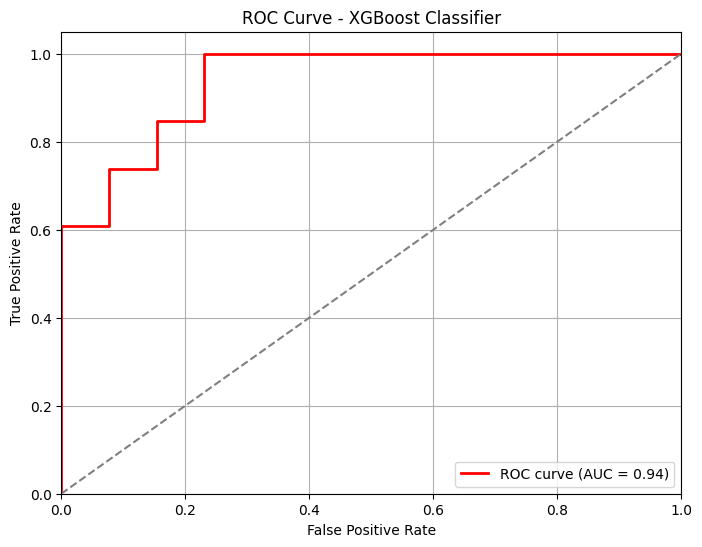

In [166]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Train the XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=0, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Predict status for X_test_scaled dataset
xgb_y_pred = xgb_model.predict(X_test_scaled)

# Confusion Matrix for XGBoost Model
print("Confusion Matrix : XGBoost")
print(confusion_matrix(y_test, xgb_y_pred))

# Classification Report for XGBoost Model
classRep = classification_report(y_test, xgb_y_pred, digits=2)
print(classRep)

# Compute ROC Curve and AUC
xgb_y_prob = xgb_model.predict_proba(X_test_scaled)[:, 1]  # Probability for the positive class
fpr, tpr, _ = roc_curve(y_test, xgb_y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Base Models with Hyperparameter Tuning
rf = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=0)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=0)
xgb = XGBClassifier(n_estimators=200, max_depth=7, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=0)
svm = SVC(kernel='rbf', C=10, probability=True, random_state=0)  # SVM with Radial Basis Function
lr = LogisticRegression(C=1, solver='liblinear', random_state=0)

# Stacking Classifier (Advanced Ensemble)
stacking = StackingClassifier(
    estimators=[('RF', rf), ('GB', gb), ('XGB', xgb), ('SVM', svm)],
    final_estimator=LogisticRegression(),
    stack_method='auto'
)

# Train Ensemble Model
stacking.fit(X_train_scaled, y_train)

# Predictions
stacking_y_pred = stacking.predict(X_test_scaled)
accuracy = accuracy_score(y_test, stacking_y_pred)

# Print Accuracy
print(f"Stacking Ensemble Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
print("Confusion Matrix : Stacking Ensemble Model")
print(confusion_matrix(y_test, stacking_y_pred))

# Classification Report
classRep = classification_report(y_test, stacking_y_pred, digits=2)
print(classRep)

# Compute ROC Curve and AUC
stacking_y_prob = stacking.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, stacking_y_prob)
roc_auc = auc(fpr, tpr)



Stacking Ensemble Accuracy: 94.92%
Confusion Matrix : Stacking Ensemble Model
[[10  3]
 [ 0 46]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.94      1.00      0.97        46

    accuracy                           0.95        59
   macro avg       0.97      0.88      0.92        59
weighted avg       0.95      0.95      0.95        59



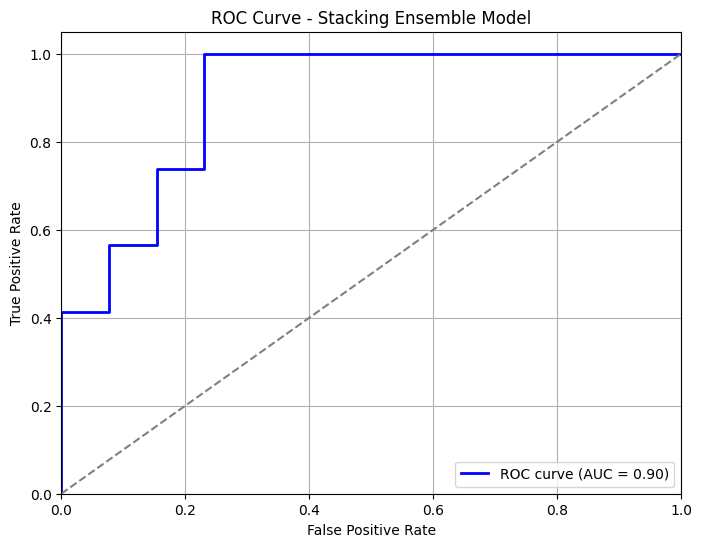

In [171]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Ensemble Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [172]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Models
models = {
    "Logistic Regression": LogisticRegression(random_state=0),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=15, random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=0),
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=7, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=0),
    "SVM": SVC(kernel='rbf', C=10, probability=True, random_state=0),
}

# Train and Evaluate Models
accuracy_scores = {}
roc_curves = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

    # Get ROC curve values
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curves[name] = (fpr, tpr, auc(fpr, tpr))

# Stacking Ensemble Model
stacking = StackingClassifier(
    estimators=[('RF', models['Random Forest']), ('GB', models['Gradient Boosting']),
                ('XGB', models['XGBoost']), ('SVM', models['SVM'])],
    final_estimator=LogisticRegression(),
    stack_method='auto'
)
stacking.fit(X_train_scaled, y_train)
stacking_y_pred = stacking.predict(X_test_scaled)
accuracy_scores["Stacking Ensemble"] = accuracy_score(y_test, stacking_y_pred)

# ROC for Stacking Ensemble
stacking_y_prob = stacking.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, stacking_y_prob)
roc_curves["Stacking Ensemble"] = (fpr, tpr, auc(fpr, tpr))

# Print Accuracy Scores
for model, acc in accuracy_scores.items():
    print(f"{model}: {acc * 100:.2f}%")


Logistic Regression: 86.44%
Random Forest: 93.22%
Gradient Boosting: 91.53%
XGBoost: 93.22%
SVM: 91.53%
Stacking Ensemble: 94.92%


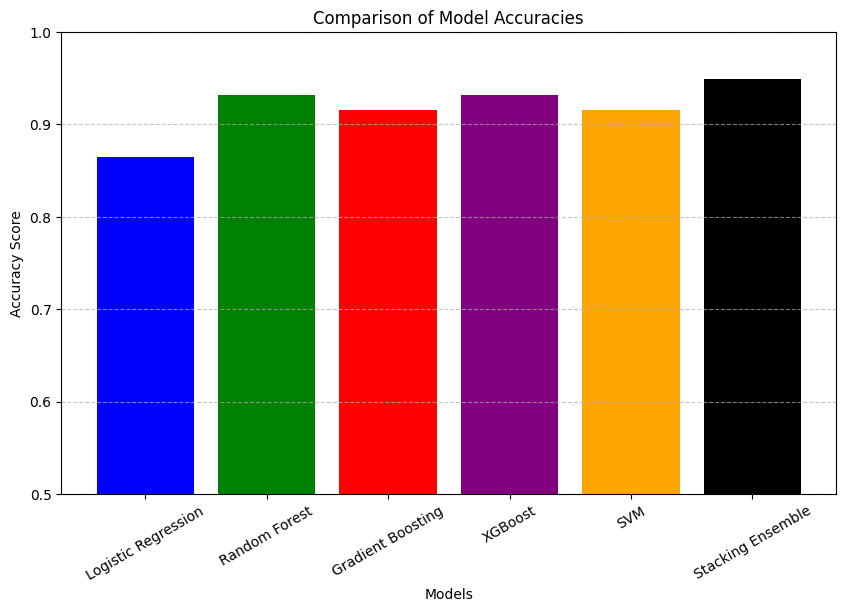

In [173]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange', 'black'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracies")
plt.ylim([0.5, 1])  # Adjust based on dataset accuracy range
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


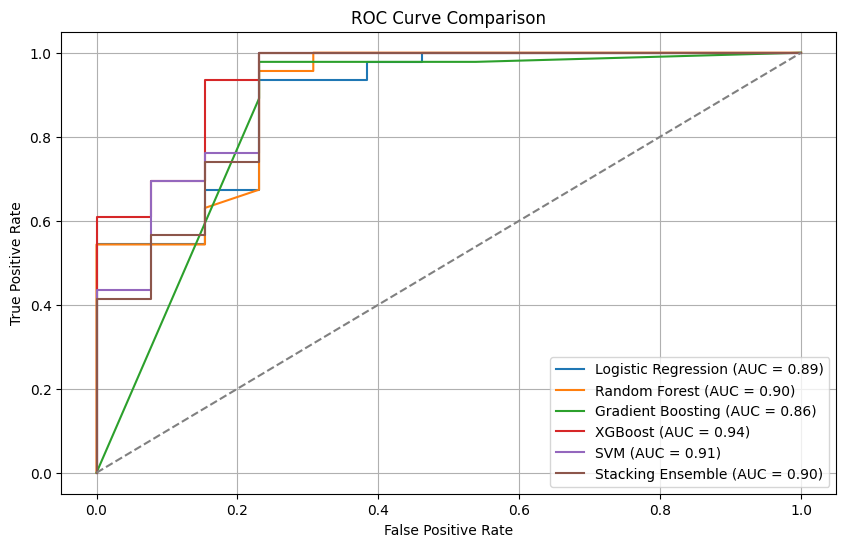

In [174]:
plt.figure(figsize=(10, 6))

for model_name, (fpr, tpr, auc_score) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()
